# Import libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import pathlib
import cv2
import tensorflow as tf
import random 

from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Explore the images from image preparation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# img_loc = 'C:/Users/Asus/Documents/Thesis/Me/Dataset'
# Root directory of the project
ROOT_DIR = os.path.abspath("../")
img_loc = "gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset"
print(img_loc)

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset


In [ ]:
data_dir = pathlib.Path(img_loc)

In [ ]:
data_dir

PosixPath('gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset')

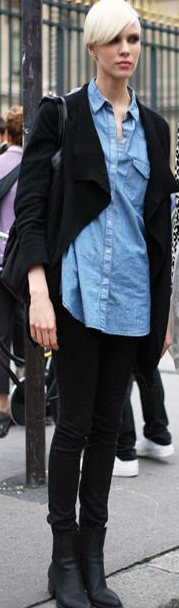

In [ ]:
# Load a random image from the images folder
europe = list(data_dir.glob('european-street-fashion-output/test/*'))
PIL.Image.open(str(europe[0]))

In [ ]:
# img_eu_loc = img_loc + '/european-street-fashion-output'
# img_jp_loc = img_loc + '/harajuku-kawaii-street-fashion-output'
# img_th_loc = img_loc + '/thai-street-fashion-output'

img_eu_loc = img_loc + '/european-street-fashion-output/test'
img_jp_loc = img_loc + '/harajuku-kawaii-street-fashion-output/test'
img_th_loc = img_loc + '/thai-street-fashion-output/test'

In [ ]:
img_jp_loc

'gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test'

#### EUROPEAN

In [ ]:
dim_i_list = []
dim_j_list = []
img_list = []
label_list = []
idx = 0
for img_name in list(os.listdir(img_eu_loc)):
    img_loc = '{}/{}'.format(img_eu_loc, img_name)
    img = cv2.imread(img_loc)
    print('{}: {} - {}'.format(img_loc, img.shape, idx))
    dim_i_list.append(img.shape[0])
    dim_j_list.append(img.shape[1])
    img_list.append(img)
    label_list.append(0)
    idx = idx+1

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00000.png: (608, 179, 3) - 0
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00001.png: (608, 179, 3) - 1
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00005.png: (830, 269, 3) - 2
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00006.png: (1124, 479, 3) - 3
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00008.png: (1114, 395, 3) - 4
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00009.png: (652, 213, 3) - 5
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00010.png: (2326, 759, 3) - 6
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/european-street-fashion-output/test/test00013.png: (2241, 1218, 3) - 7
gdrive/MyDr

#### THAI

In [ ]:
for img_name in list(os.listdir(img_th_loc)):
    img_loc = '{}/{}'.format(img_th_loc, img_name)
    img = cv2.imread(img_loc)
    print('{}: {} - {}'.format(img_loc, img.shape, idx))
    dim_i_list.append(img.shape[0])
    dim_j_list.append(img.shape[1])
    img_list.append(img)
    label_list.append(0)
    idx = idx+1

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00004.png: (735, 229, 3) - 268
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00005.png: (735, 229, 3) - 269
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00000.png: (613, 234, 3) - 270
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00003.png: (735, 229, 3) - 271
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00006.png: (797, 273, 3) - 272
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00010.png: (300, 78, 3) - 273
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00011.png: (300, 78, 3) - 274
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/thai-street-fashion-output/test/test00007.png: (797, 273, 3) - 275
gdrive/MyDrive/NewThesis_Poonyawat

#### KAWAII

In [ ]:
for img_name in list(os.listdir(img_jp_loc)):
    img_loc = '{}/{}'.format(img_jp_loc, img_name)
    img = cv2.imread(img_loc)
    print('{}: {} - {}'.format(img_loc, img.shape, idx))
    dim_i_list.append(img.shape[0])
    dim_j_list.append(img.shape[1])
    img_list.append(img)
    label_list.append(1)
    idx = idx+1

gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test/test00006.png: (624, 275, 3) - 485
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test/test00000.png: (610, 367, 3) - 486
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test/test00009.png: (767, 255, 3) - 487
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test/test00011.png: (1192, 418, 3) - 488
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test/test00015.png: (1265, 489, 3) - 489
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test/test00016.png: (1224, 356, 3) - 490
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-street-fashion-output/test/test00018.png: (737, 320, 3) - 491
gdrive/MyDrive/NewThesis_Poonyawat_Woottisart/Dataset/harajuku-kawaii-str

In [ ]:
np.mean(dim_i_list), np.std(dim_i_list)

(773.0925925925926, 502.8930599026166)

In [ ]:
np.mean(dim_j_list), np.std(dim_j_list)

(344.5154320987654, 252.3863998387764)

In [ ]:
len(dim_i_list)

648

In [ ]:
# 286 - japanese | 488 - thai

# Image Scaling

In [ ]:
h = 420
w = 240

img_scaling = [np.zeros(shape=(h, w, 3)) for i in range(len(img_list))]
for i in range(len(img_list)):
    img_scaling[i] = cv2.resize(img_list[i], dsize=(w, h), interpolation = cv2.INTER_CUBIC)

In [ ]:
len(img_scaling), len(label_list)

(648, 648)

In [ ]:
sample_test_jp = img_scaling[488]
sample_test_th = img_scaling[286]
sample_test_eu = img_scaling[95]

# Dataset Spliting

Random split the dataframe into 2 sub-dataframes for training and testing

In [ ]:
training_rate = 0.75
testing_rate = 1-training_rate
number_of_img = len(label_list)

In [ ]:
all_set = set(range(0, number_of_img))
training_set = set(random.sample(range(0, number_of_img), int(training_rate*number_of_img)))
testing_set = all_set-training_set

In [ ]:
training_idx = np.array(list(training_set))
testing_idx = np.array(list(testing_set))
training_idx.sort()
testing_idx.sort()

In [ ]:
training_idx

array([  0,   1,   4,   5,   6,   7,   9,  10,  12,  13,  14,  15,  16,
        17,  19,  20,  21,  22,  23,  24,  28,  29,  31,  32,  33,  35,
        36,  40,  41,  42,  44,  45,  46,  47,  48,  49,  52,  53,  54,
        56,  59,  60,  61,  64,  65,  66,  67,  68,  69,  70,  72,  73,
        74,  76,  82,  83,  85,  86,  88,  89,  91,  92,  93,  94,  95,
        96,  97,  99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 117, 118, 120, 121, 122, 123, 124, 126, 127,
       128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       143, 144, 145, 146, 148, 149, 150, 151, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 164, 165, 166, 167, 168, 170, 173, 175,
       176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 195, 196, 198, 200, 201, 202, 205, 206, 207,
       209, 210, 211, 213, 215, 217, 218, 219, 220, 223, 224, 225, 226,
       227, 228, 229, 230, 231, 233, 234, 235, 236, 237, 238, 23

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

for idx in training_idx:
    x_train.append(img_scaling[idx])
    y_train.append(label_list[idx])

for idx in testing_idx:
    x_test.append(img_scaling[idx])
    y_test.append(label_list[idx])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
len(x_train), len(x_train[0]), len(x_train[0][0]), len(x_train[0][0][0])

(486, 420, 240, 3)

# Resampling the data (for balancing)

In [ ]:
x_tmp_0 = x_train[np.where(y_train==0)[0]]
x_tmp_1 = x_train[np.where(y_train==1)[0]]
y_tmp_0 = y_train[np.where(y_train==0)[0]]
y_tmp_1 = y_train[np.where(y_train==1)[0]]

In [ ]:
len(x_tmp_0), len(x_tmp_0[0]), len(x_tmp_0[0][0]), len(x_tmp_0[0][0][0])

(371, 420, 240, 3)

In [ ]:
len(x_tmp_1), len(x_tmp_1[0]), len(x_tmp_1[0][0]), len(x_tmp_1[0][0][0])

(115, 420, 240, 3)

In [ ]:
BUFFER_SIZE = 500
BATCH_SIZE = 16
EPOCHS = 10

In [ ]:
def make_ds(features, labels):
    ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
    ds = ds.shuffle(BUFFER_SIZE).repeat()
    return ds

In [ ]:
ds_1 = make_ds(x_tmp_1, y_tmp_1)
ds_0 = make_ds(x_tmp_0, y_tmp_0)
len_1 = len(x_tmp_1)
len_0 = len(x_tmp_0)

In [ ]:
resampled_ds = tf.data.Dataset.sample_from_datasets([ds_1, ds_0], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*len_0/BATCH_SIZE)
resampled_steps_per_epoch

47.0

# Functions

In [ ]:
# network creating from given parameter
# input: 
#       number of layers in network (integer), 
#       list of infomation for each layer (list of dictionaries), 
#       list of number of nodes for each dense layer (list of integer(s)), 
#       (optional) list of pooling type for each layer (list of string)
# output: 
#       network topology

def gen_network(n_layers, layers_list, dense_layer_node_list, pooling_set=None): 
    
    # layer_list = list of layers those combined with n_node, padding, activation_fn
    
    return_network = [layers.Rescaling(1./255, input_shape=(h, w, 3))]
    
    # Convolutional Neural Network
    
    for i in range(n_layers):
        temp_conv = layers.Conv2D(layers_list[i]['n_node'], 3, padding=layers_list[i]['padding'], activation=layers_list[i]['activ_fn'])
        return_network.append(temp_conv)
        if(pooling_set==None):
            temp_pooling = layers.MaxPooling2D()
        return_network.append(temp_pooling)
    
    # Dense Layer
    
    return_network.append(layers.Flatten())
    
    for n_node_dense in dense_layer_node_list:
        temp_dense = layers.Dense(n_node_dense, activation='relu')
        return_network.append(temp_dense)
        
    return_network.append(layers.Dense(2))
    
    return return_network

In [ ]:
# generate the set of parameter for a chromosome
# input: -
# output: 
#       number of layers (integer), 
#       list of infomation for each layer (list of dictionaries), 
#       list of number of nodes for each dense layer (list of integer(s))

def gen_param():
    
    tmp = random.random()
    if(tmp<0.1):
        n_layer = 2
    elif(tmp<0.35):
        n_layer = 3
    elif(tmp<0.75):
        n_layer = 4
    elif(tmp<0.9):
        n_layer = 5
    else:
        n_layer = 6
    
    layers_list = []
    layers_list.append({'n_node': 8*random.randint(1, 4), 'padding': 'same', 'activ_fn': 'relu'})
    for i in range(1, n_layer):
        layers_list.append({'n_node': 4*random.randint(1, 6), 'padding': 'same', 'activ_fn': 'relu'})
    
    dense_layer_nodes = [2**random.randint(1, 8)]
    random_threshold = 0.2
    
    while(random.random()<random_threshold):
        dense_layer_nodes.append(2**random.randint(1, 4))
        random_threshold = random_threshold/4
    
    return n_layer, layers_list, dense_layer_nodes

In [ ]:
# generate the set of parameter for a chromosome with mutation process
# input: list of original parameter (list)
# output: modified parameters (number of layers, list of layers, list of dense layers)

def gen_param_crossover(param):

    n_layer = param[0].copy()
    
    layers_list = param[1].copy()
    for i in range(n_layer):
        if(random.random()<=0.6):
            layers_list[i] = {'n_node': 4*random.randint(1, 6), 'padding': 'same', 'activ_fn': 'relu'}
    
    dense_layer_nodes = param[2].copy()
    random_threshold = 0.8
    for i in range(len(param[2])):
        if(random.random()<=0.6):
            dense_layer_nodes[i] = 2**random.randint(1, 4)
        random_threshold = random_threshold/4

    while(random.random()<random_threshold):
        dense_layer_nodes.append(2**random.randint(1, 4))
        random_threshold = random_threshold/4
    
    return n_layer, layers_list, dense_layer_nodes

In [ ]:
# model training process 
# input: 
#       network topology, 
#       training dataset, 
#       epoches (integer), 
#       number of steps per epoch (integer), 
#       list of testing images (list of image arrays),
#       list of labels (list of integers (classes))
# output: model

def model_training(network, resampled_ds, epoch, resampled_steps_per_epoch, x_test, y_test):
    model = Sequential(network)
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['binary_accuracy'])
    # print(model.summary())
    
    resampled_history = model.fit(resampled_ds,
                                  epochs=epoch,
                                  steps_per_epoch=resampled_steps_per_epoch,
                                  validation_data=(x_test, y_test), verbose=0)
    return model

In [ ]:
# model evaluation process 
# input: model, list of testing images (list of image arrays), list of labels (list of integers (classes))
# output: score of model (4 floats)

def evaluate(model, x_test, y_test):
    model.evaluate(x_test, y_test, verbose=2)

    probability_model = tf.keras.Sequential([
                                             model,
                                             tf.keras.layers.Softmax()])
    pred_prob = probability_model(x_test).numpy()
    
    pred_class = []
    for i in range(len(pred_prob)):
        pred_class.append(np.where(pred_prob[i][0]>pred_prob[i][1], 0, 1))
        
    # print(confusion_matrix(y_test, pred_class))
    acc_score = accuracy_score(y_test, pred_class)
    prec_score = precision_score(y_test, pred_class)
    rec_score = recall_score(y_test, pred_class)
    # print('accuracy_score: {}'.format(acc_score))
    # print('precision_score: {}'.format(prec_score))
    # print('recall_score: {}'.format(rec_score))

    if((prec_score==0)&(rec_score==0)):
        f1_score = 0
    else:
        f1_score = 2*prec_score*rec_score/(prec_score+rec_score)

    return acc_score, prec_score, rec_score, f1_score

In [ ]:
# 1st generation of genetic algorithm (without crossover process)
# input: (if exists) best set of parameter, model, model evaluation
# output: list of set of parameters, list of models, list of model evaluation

def gen_1st(param_prev=None, model_prev=None):

    if((param_prev is None)&(model_prev is None)):
        params = np.array([None, None, None])
        models = np.array([None])
        eval_val = np.array([0, 0, 0, 0], ndmin=2)
        count = 0
    else:
        acc_score, prec_score, rec_score, f1_score = evaluate(model_prev, x_test, y_test)
        eval_val = np.array([acc_score, prec_score, rec_score, f1_score], ndmin=2)
        params = param_prev.copy()
        models = np.array([model_prev])
        count = 1

    while(count<30):
        try:
            n_layer, layers_list, dense_layer_nodes = gen_param()
            print('n_layer: {}'.format(n_layer))
            print('layers_list: {}'.format(layers_list))
            print('dense_layer_nodes: {}'.format(dense_layer_nodes))
            network = gen_network(n_layers=n_layer, layers_list=layers_list, dense_layer_node_list=dense_layer_nodes)
            model = model_training(network=network, resampled_ds=resampled_ds, epoch=EPOCHS, resampled_steps_per_epoch=resampled_steps_per_epoch, x_test=x_test, y_test=y_test)
            

            acc_score, prec_score, rec_score, f1_score = evaluate(model, x_test, y_test)
            eval_val = np.append(eval_val, np.array([acc_score, prec_score, rec_score, f1_score], ndmin=2), axis=0)
            params = np.append(params, [n_layer, layers_list, dense_layer_nodes])
            models = np.append(models, [model])
            count = count + 1

        except:
            continue

    return params, models, eval_val


In [ ]:
# 1st generation of genetic algorithm (without crossover process)
# input: best set of parameter, model, model evaluation from previous generation
# output: list of set of parameters, list of models, list of model evaluation

def gen_nth(param_best, model_best, eval_val_best):
    # params = np.array([param_best])
    # models = np.array([model_best])
    params = param_best.copy()
    models = model_best.copy()
    eval_val = np.array(eval_val_best, ndmin=2)
    count = len(models)
    for i in range(len(model_best)):
        try:
            n_layer, layers_list, dense_layer_nodes = gen_param_crossover(params[3*i:3*i+3].copy())
            print('n_layer: {}'.format(n_layer))
            print('layers_list: {}'.format(layers_list))
            print('dense_layer_nodes: {}'.format(dense_layer_nodes))
            network = gen_network(n_layers=n_layer, layers_list=layers_list, dense_layer_node_list=dense_layer_nodes)
            model = model_training(network=network, resampled_ds=resampled_ds, epoch=EPOCHS, resampled_steps_per_epoch=resampled_steps_per_epoch, x_test=x_test, y_test=y_test)

            acc_score, prec_score, rec_score, f1_score = evaluate(model, x_test, y_test)
            eval_val = np.append(eval_val, np.array([acc_score, prec_score, rec_score, f1_score], ndmin=2), axis=0)
            params = np.append(params, [n_layer, layers_list, dense_layer_nodes])
            models = np.append(models, [model])
            count = count + 1
        except:
            continue


    while(count<30):
        try:
            n_layer, layers_list, dense_layer_nodes = gen_param()
            print('n_layer: {}'.format(n_layer))
            print('layers_list: {}'.format(layers_list))
            print('dense_layer_nodes: {}'.format(dense_layer_nodes))
            network = gen_network(n_layers=n_layer, layers_list=layers_list, dense_layer_node_list=dense_layer_nodes)
            model = model_training(network=network, resampled_ds=resampled_ds, epoch=EPOCHS, resampled_steps_per_epoch=resampled_steps_per_epoch, x_test=x_test, y_test=y_test)
            

            acc_score, prec_score, rec_score, f1_score = evaluate(model, x_test, y_test)
            eval_val = np.append(eval_val, np.array([acc_score, prec_score, rec_score, f1_score], ndmin=2), axis=0)
            params = np.append(params, [n_layer, layers_list, dense_layer_nodes])
            models = np.append(models, [model])
            count = count + 1
        except:
            continue

    return params, models, eval_val

In [ ]:
# Specifically sort for list of set of parameter
# input: order of sorted list of models by score (list of integers)
# output: order of index of parameter variable

def sort_extended(order_original):
    orderExtended = []
    for i in range(len(order_original)):
        orderExtended.append(3*order_original[i])
        orderExtended.append(3*order_original[i]+1)
        orderExtended.append(3*order_original[i]+2)
    return orderExtended

In [ ]:
# Save the set of parameters and model evalution
# input: generation (integer), list of set of parameters (list of dictionaries), list of model evaluations (list of arrays)
# output: -

def create_report(gen, params, eval_val):
    f = open('gdrive/MyDrive/Colab Notebooks/checkpoints/report_param_gen{:02d}.txt'.format(gen), 'w')
    st_idx = 0
    if(gen==1):
        st_idx = 1
    for i in range(3*st_idx, params.shape[0]):
        f.writelines('{}\n'.format(params[i]))
    f.close()
    f = open('gdrive/MyDrive/Colab Notebooks/checkpoints/report_eval_gen{:02d}.txt'.format(gen), 'w')
    for i in range(st_idx, eval_val.shape[0]):
        f.writelines('{}\n'.format(eval_val[i]))
    f.close()

In [ ]:
# Main function (start without previous model)
# input: number of generations (integer), number of best chromosomes be keeping to next generations (integer)
# output: list of set of parameter, list of models, list of model evaluations in first 3 and the last generation.

def start_from_new(gen=15, n_select_max=3):

    print('GEN 1:')
    params, models, eval_val = gen_1st()
    create_report(1, params, eval_val)

    print('\n\n\nGEN 2:')
    tmp_params = params.copy()
    tmp_models = models.copy()
    tmp_eval_val = eval_val.copy()
    
    param_best_set = tmp_params[sort_extended(list(np.argsort(tmp_eval_val[:, 3])[::-1]))][0:3*n_select_max]
    model_best_set = tmp_models[list(np.argsort(tmp_eval_val[:, 3])[::-1])][0:n_select_max]
    eval_val_best_set = tmp_eval_val[np.argsort(tmp_eval_val[:, 3])[::-1]][0:n_select_max]
    # model_best_set = list(set(model_best_set))
    # eval_val_best_set = list(set(eval_val_best_set))
    params_2nd, models_2nd, eval_val_2nd = gen_nth(param_best=param_best_set, model_best=model_best_set, eval_val_best=eval_val_best_set)
    create_report(2, params_2nd, eval_val_2nd)

    print('\n\n\nGEN 3:')
    tmp_params = params_2nd.copy()
    tmp_models = models_2nd.copy()
    tmp_eval_val = eval_val_2nd.copy()
    param_best_set = tmp_params[sort_extended(list(np.argsort(tmp_eval_val[:, 3])[::-1]))][0:3*n_select_max]
    model_best_set = tmp_models[list(np.argsort(tmp_eval_val[:, 3])[::-1])][0:n_select_max]
    eval_val_best_set = tmp_eval_val[np.argsort(tmp_eval_val[:, 3])[::-1]][0:n_select_max]
    # model_best_set = list(set(model_best_set))
    # eval_val_best_set = list(set(eval_val_best_set))
    params_3rd, models_3rd, eval_val_3rd = gen_nth(param_best=param_best_set, model_best=model_best_set, eval_val_best=eval_val_best_set)
    create_report(3, params_3rd, eval_val_3rd)

    params_nth, models_nth, eval_val_nth = params_3rd.copy(), models_3rd.copy(), eval_val_3rd.copy()
    for i in range(gen-3):
        print('\n\n\nGEN {}:'.format(i+4))
        tmp_params = params_nth.copy()
        tmp_models = models_nth.copy()
        tmp_eval_val = eval_val_nth.copy()
        param_best_set = tmp_params[sort_extended(list(np.argsort(tmp_eval_val[:, 3])[::-1]))][0:3*n_select_max]
        model_best_set = tmp_models[list(np.argsort(tmp_eval_val[:, 3])[::-1])][0:n_select_max]
        eval_val_best_set = tmp_eval_val[np.argsort(tmp_eval_val[:, 3])[::-1]][0:n_select_max]
        # model_best_set = list(set(model_best_set))
        # eval_val_best_set = list(set(eval_val_best_set))
        params_nth, models_nth, eval_val_nth = gen_nth(param_best=param_best_set, model_best=model_best_set, eval_val_best=eval_val_best_set)
        create_report(i+4, params_nth, eval_val_nth)

    return params, models, eval_val, params_2nd, models_2nd, eval_val_2nd, params_3rd, models_3rd, eval_val_3rd, params_nth, models_nth, eval_val_nth

In [ ]:
# get model and model parameter from checkpoint
# input: filename (string)
# output: set of model parameters, model

def get_prev_model(filename):

    f = open('gdrive/MyDrive/Colab Notebooks/checkpoints/{}.txt'.format(filename), 'r')

    paramList = []

    for line in f:
        tmp = line.replace('\\n', '')
        paramList.append(line)

    f.close()

    tmp = paramList[1].strip('][').split(', ')
    paramList[1] = [None for i in range(len(tmp))]
    for i in range(len(tmp)):
        if(i%3==0):
            paramList[1][i] = tmp[i].split(': ')[1].replace('}', '')
        else:
            paramList[1][i] = tmp[i].split(': ')[1].replace('}', '').split('\'')[1]
    paramList[1][-1] = paramList[1][-1].split(']')[0]

    tmp = []
    idx = 0
    while(idx<len(paramList[1])):
        tmp.append({'n_node': int(paramList[1][idx]), 'padding': paramList[1][idx+1], 'activ_fn': paramList[1][idx+2]})
        idx = idx+3
    paramList[1] = tmp.copy()

    tmp = paramList[2].strip('][').split(', ')
    paramList[2] = []
    for i in range(len(tmp)-1):
        paramList[2].append(int(tmp[0]))
    paramList[2].append(int(tmp[-1].split(']')[0]))

    param_prev = np.array([int(paramList[0]), paramList[1], paramList[2]])

    net = gen_network(n_layers=int(paramList[0]), layers_list=paramList[1], dense_layer_node_list=paramList[2])
    model_prev = Sequential(net)
    model_prev.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['binary_accuracy'])
    model_prev.load_weights('gdrive/MyDrive/Colab Notebooks/checkpoints/{}'.format(filename))

    return param_prev, model_prev

In [ ]:
# Main function (start previous model)
# input: filename (string), number of generations (integer), number of best chromosomes be keeping to next generations (integer)
# output: list of set of parameter, list of models, list of model evaluations in first 3 and the last generation.

def continue_from_prev_run(filename, gen, n_select_max):

    # loc = 'gdrive/MyDrive/Colab Notebooks/checkpoints/'
    # filename = loc + filename

    param_prev, model_prev = get_prev_model(filename)

    print('GEN 1:')
    params, models, eval_val = gen_1st(param_prev, model_prev)
    create_report(1, params, eval_val)

    print('\n\n\nGEN 2:')
    tmp_params = params.copy()
    tmp_models = models.copy()
    tmp_eval_val = eval_val.copy()
    
    param_best_set = tmp_params[sort_extended(list(np.argsort(tmp_eval_val[:, 3])[::-1]))][0:3*n_select_max]
    model_best_set = tmp_models[list(np.argsort(tmp_eval_val[:, 3])[::-1])][0:n_select_max]
    eval_val_best_set = tmp_eval_val[np.argsort(tmp_eval_val[:, 3])[::-1]][0:n_select_max]
    # model_best_set = list(set(model_best_set))
    # eval_val_best_set = list(set(eval_val_best_set))
    params_2nd, models_2nd, eval_val_2nd = gen_nth(param_best=param_best_set, model_best=model_best_set, eval_val_best=eval_val_best_set)
    create_report(2, params_2nd, eval_val_2nd)

    print('\n\n\nGEN 3:')
    tmp_params = params_2nd.copy()
    tmp_models = models_2nd.copy()
    tmp_eval_val = eval_val_2nd.copy()
    param_best_set = tmp_params[sort_extended(list(np.argsort(tmp_eval_val[:, 3])[::-1]))][0:3*n_select_max]
    model_best_set = tmp_models[list(np.argsort(tmp_eval_val[:, 3])[::-1])][0:n_select_max]
    eval_val_best_set = tmp_eval_val[np.argsort(tmp_eval_val[:, 3])[::-1]][0:n_select_max]
    # model_best_set = list(set(model_best_set))
    # eval_val_best_set = list(set(eval_val_best_set))
    params_3rd, models_3rd, eval_val_3rd = gen_nth(param_best=param_best_set, model_best=model_best_set, eval_val_best=eval_val_best_set)
    create_report(3, params_3rd, eval_val_3rd)

    params_nth, models_nth, eval_val_nth = params_3rd.copy(), models_3rd.copy(), eval_val_3rd.copy()
    for i in range(gen-3):
        print('\n\n\nGEN {}:'.format(i+4))
        tmp_params = params_nth.copy()
        tmp_models = models_nth.copy()
        tmp_eval_val = eval_val_nth.copy()
        param_best_set = tmp_params[sort_extended(list(np.argsort(tmp_eval_val[:, 3])[::-1]))][0:3*n_select_max]
        model_best_set = tmp_models[list(np.argsort(tmp_eval_val[:, 3])[::-1])][0:n_select_max]
        eval_val_best_set = tmp_eval_val[np.argsort(tmp_eval_val[:, 3])[::-1]][0:n_select_max]
        # model_best_set = list(set(model_best_set))
        # eval_val_best_set = list(set(eval_val_best_set))
        params_nth, models_nth, eval_val_nth = gen_nth(param_best=param_best_set, model_best=model_best_set, eval_val_best=eval_val_best_set)
        create_report(i+4, params_nth, eval_val_nth)
        
    return params, models, eval_val, params_2nd, models_2nd, eval_val_2nd, params_3rd, models_3rd, eval_val_3rd, params_nth, models_nth, eval_val_nth

# Run

In [ ]:
params, models, eval_val, params_2nd, models_2nd, eval_val_2nd, params_3rd, models_3rd, eval_val_3rd, params_nth, models_nth, eval_val_nth = start_from_new(gen=50, n_select_max=3)

GEN 1:
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]
6/6 - 0s - loss: 0.6903 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]
6/6 - 0s - loss: 1.6601 - binary_accuracy: 0.5062 - 68ms/epoch - 11ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]
6/6 - 0s - loss: 0.6464 - binary_accuracy: 0.7037 - 66ms/epoch - 11ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8, 8]
6/6 - 0s - loss: 1.2423 - binary_accuracy: 0.5031 - 73ms/epoch - 12ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]
6/6 - 0s - loss: 1.3125 - binary_accuracy: 0.4722 - 63ms/epoch - 10ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1403 - binary_accuracy: 0.4537 - 75ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6865 - binary_accuracy: 0.7037 - 81ms/epoch - 13ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]
6/6 - 0s - loss: 1.3747 - binary_accuracy: 0.4907 - 75ms/epoch - 13ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]
6/6 - 0s - loss: 1.6908 - binary_accuracy: 0.7037 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6893 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]
6/6 - 0s - loss: 0.7747 - binary_accuracy: 0.7037 - 64ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5949 - binary_accuracy: 0.6667 - 82ms/epoch - 14ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]
6/6 - 0s - loss: 0.7915 - binary_accuracy: 0.6728 - 69ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6928 - binary_accuracy: 0.7037 - 65ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1797 - binary_accuracy: 0.4475 - 67ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5289 - binary_accuracy: 0.7037 - 61ms/epoch - 10ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6828 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]
6/6 - 0s - loss: 2.8232 - binary_accuracy: 0.4938 - 80ms/epoch - 13ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]
6/6 - 0s - loss: 2.1815 - binary_accuracy: 0.5123 - 67ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6982 - binary_accuracy: 0.7037 - 67ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1087 - binary_accuracy: 0.5340 - 62ms/epoch - 10ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6989 - binary_accuracy: 0.7037 - 83ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9548 - binary_accuracy: 0.3858 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6887 - binary_accuracy: 0.7037 - 62ms/epoch - 10ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6679 - binary_accuracy: 0.5062 - 84ms/epoch - 14ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]
6/6 - 0s - loss: 0.7003 - binary_accuracy: 0.7037 - 66ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3474 - binary_accuracy: 0.7037 - 66ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3521 - binary_accuracy: 0.5247 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5417 - binary_accuracy: 0.5185 - 72ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0160 - binary_accuracy: 0.3981 - 69ms/epoch - 11ms/step



GEN 2:
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7902 - binary_accuracy: 0.4846 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0743 - binary_accuracy: 0.3210 - 75ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1187 - binary_accuracy: 0.5062 - 77ms/epoch - 13ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]
6/6 - 0s - loss: 0.6913 - binary_accuracy: 0.7037 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9768 - binary_accuracy: 0.5309 - 75ms/epoch - 12ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]
6/6 - 0s - loss: 1.2088 - binary_accuracy: 0.4784 - 84ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8842 - binary_accuracy: 0.4691 - 66ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.3055 - binary_accuracy: 0.5031 - 67ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5850 - binary_accuracy: 0.4969 - 66ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4125 - binary_accuracy: 0.4969 - 62ms/epoch - 10ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0028 - binary_accuracy: 0.6605 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5418 - binary_accuracy: 0.7623 - 63ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0623 - binary_accuracy: 0.5216 - 83ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0530 - binary_accuracy: 0.3025 - 66ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5227 - binary_accuracy: 0.3858 - 78ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9666 - binary_accuracy: 0.5556 - 86ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3095 - binary_accuracy: 0.4722 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2128 - binary_accuracy: 0.5185 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6135 - binary_accuracy: 0.4969 - 87ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6945 - binary_accuracy: 0.7037 - 64ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6868 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6785 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3344 - binary_accuracy: 0.5247 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6946 - binary_accuracy: 0.7037 - 65ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 64ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2084 - binary_accuracy: 0.2963 - 85ms/epoch - 14ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16]
6/6 - 0s - loss: 1.3840 - binary_accuracy: 0.7037 - 73ms/epoch - 12ms/step



GEN 3:
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9749 - binary_accuracy: 0.4877 - 60ms/epoch - 10ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5816 - binary_accuracy: 0.7284 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6881 - binary_accuracy: 0.7037 - 64ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7949 - binary_accuracy: 0.7130 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0032 - binary_accuracy: 0.5340 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4580 - binary_accuracy: 0.5093 - 65ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6863 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5590 - binary_accuracy: 0.7222 - 64ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7394 - binary_accuracy: 0.7160 - 65ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6875 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0379 - binary_accuracy: 0.4753 - 74ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6934 - binary_accuracy: 0.4630 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1777 - binary_accuracy: 0.5247 - 67ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8637 - binary_accuracy: 0.2747 - 84ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3706 - binary_accuracy: 0.5370 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6930 - binary_accuracy: 0.7037 - 64ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1198 - binary_accuracy: 0.4660 - 66ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3804 - binary_accuracy: 0.4969 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5726 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1620 - binary_accuracy: 0.5525 - 66ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4318 - binary_accuracy: 0.4969 - 64ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0190 - binary_accuracy: 0.5185 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5559 - binary_accuracy: 0.4815 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5792 - binary_accuracy: 0.5031 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9717 - binary_accuracy: 0.5123 - 69ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6916 - binary_accuracy: 0.7037 - 81ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0078 - binary_accuracy: 0.5370 - 78ms/epoch - 13ms/step



GEN 4:
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9978 - binary_accuracy: 0.4907 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0042 - binary_accuracy: 0.5123 - 85ms/epoch - 14ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]
6/6 - 0s - loss: 2.6012 - binary_accuracy: 0.4969 - 81ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2845 - binary_accuracy: 0.4691 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8134 - binary_accuracy: 0.4938 - 62ms/epoch - 10ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9568 - binary_accuracy: 0.6975 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5959 - binary_accuracy: 0.7809 - 73ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0667 - binary_accuracy: 0.4907 - 81ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9274 - binary_accuracy: 0.6265 - 75ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6949 - binary_accuracy: 0.7037 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1690 - binary_accuracy: 0.5216 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8818 - binary_accuracy: 0.5309 - 68ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3756 - binary_accuracy: 0.5031 - 80ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7846 - binary_accuracy: 0.6142 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1741 - binary_accuracy: 0.5031 - 65ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6233 - binary_accuracy: 0.4846 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5561 - binary_accuracy: 0.5154 - 68ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3005 - binary_accuracy: 0.6821 - 83ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6907 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]
6/6 - 0s - loss: 2.4234 - binary_accuracy: 0.4691 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7614 - binary_accuracy: 0.4784 - 68ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6959 - binary_accuracy: 0.7037 - 69ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2294 - binary_accuracy: 0.4969 - 89ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0289 - binary_accuracy: 0.5093 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6318 - binary_accuracy: 0.5093 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6866 - binary_accuracy: 0.7037 - 69ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3064 - binary_accuracy: 0.5154 - 71ms/epoch - 12ms/step



GEN 5:
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3299 - binary_accuracy: 0.4846 - 75ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7449 - binary_accuracy: 0.6296 - 89ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6941 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4666 - binary_accuracy: 0.2963 - 80ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6879 - binary_accuracy: 0.7037 - 62ms/epoch - 10ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2897 - binary_accuracy: 0.4414 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0231 - binary_accuracy: 0.7068 - 81ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6719 - binary_accuracy: 0.5340 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6796 - binary_accuracy: 0.5494 - 66ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7125 - binary_accuracy: 0.5000 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1276 - binary_accuracy: 0.5123 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1987 - binary_accuracy: 0.6790 - 83ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6894 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5404 - binary_accuracy: 0.2840 - 78ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6957 - binary_accuracy: 0.7037 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8982 - binary_accuracy: 0.5247 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2298 - binary_accuracy: 0.5031 - 80ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4966 - binary_accuracy: 0.2562 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6981 - binary_accuracy: 0.7037 - 70ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6900 - binary_accuracy: 0.7037 - 83ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6166 - binary_accuracy: 0.7037 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1945 - binary_accuracy: 0.5123 - 65ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9764 - binary_accuracy: 0.5093 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4604 - binary_accuracy: 0.5000 - 91ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5551 - binary_accuracy: 0.4907 - 63ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6918 - binary_accuracy: 0.7037 - 69ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5912 - binary_accuracy: 0.4012 - 68ms/epoch - 11ms/step



GEN 6:
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3117 - binary_accuracy: 0.4877 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8635 - binary_accuracy: 0.4691 - 87ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4765 - binary_accuracy: 0.4907 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8318 - binary_accuracy: 0.4938 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6919 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0999 - binary_accuracy: 0.5031 - 79ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6031 - binary_accuracy: 0.4877 - 68ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6925 - binary_accuracy: 0.7037 - 75ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7949 - binary_accuracy: 0.5247 - 68ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6907 - binary_accuracy: 0.7037 - 93ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4017 - binary_accuracy: 0.4630 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6694 - binary_accuracy: 0.6049 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6107 - binary_accuracy: 0.4938 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4505 - binary_accuracy: 0.4969 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2332 - binary_accuracy: 0.4660 - 75ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5571 - binary_accuracy: 0.7716 - 81ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2222 - binary_accuracy: 0.4198 - 77ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3270 - binary_accuracy: 0.4846 - 83ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6951 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7050 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8976 - binary_accuracy: 0.5093 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8681 - binary_accuracy: 0.2963 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1360 - binary_accuracy: 0.4414 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6236 - binary_accuracy: 0.7037 - 81ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3327 - binary_accuracy: 0.4938 - 93ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6947 - binary_accuracy: 0.5401 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0315 - binary_accuracy: 0.5340 - 92ms/epoch - 15ms/step



GEN 7:
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6965 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2263 - binary_accuracy: 0.4105 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6881 - binary_accuracy: 0.5185 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8944 - binary_accuracy: 0.7037 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5272 - binary_accuracy: 0.5278 - 85ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6917 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1580 - binary_accuracy: 0.5247 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.9088 - binary_accuracy: 0.3951 - 76ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7003 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3876 - binary_accuracy: 0.5031 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2085 - binary_accuracy: 0.5000 - 83ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4558 - binary_accuracy: 0.6019 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5355 - binary_accuracy: 0.4691 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6951 - binary_accuracy: 0.7037 - 66ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3799 - binary_accuracy: 0.4969 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4865 - binary_accuracy: 0.4815 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8333 - binary_accuracy: 0.6296 - 67ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3634 - binary_accuracy: 0.3549 - 66ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6938 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8466 - binary_accuracy: 0.7346 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6949 - binary_accuracy: 0.7037 - 69ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6865 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7243 - binary_accuracy: 0.7469 - 71ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6865 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.0137 - binary_accuracy: 0.5309 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8545 - binary_accuracy: 0.4722 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9281 - binary_accuracy: 0.5000 - 84ms/epoch - 14ms/step



GEN 8:
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6910 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2180 - binary_accuracy: 0.4938 - 69ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7263 - binary_accuracy: 0.7469 - 72ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1602 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5785 - binary_accuracy: 0.4537 - 80ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5694 - binary_accuracy: 0.7562 - 66ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0173 - binary_accuracy: 0.2963 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9058 - binary_accuracy: 0.5185 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7438 - binary_accuracy: 0.6080 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3401 - binary_accuracy: 0.4815 - 78ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6889 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2382 - binary_accuracy: 0.5185 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9534 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1119 - binary_accuracy: 0.2994 - 66ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9558 - binary_accuracy: 0.5000 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6933 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4124 - binary_accuracy: 0.2685 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4432 - binary_accuracy: 0.5000 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3032 - binary_accuracy: 0.5370 - 74ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8280 - binary_accuracy: 0.3333 - 75ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6605 - binary_accuracy: 0.7284 - 66ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6862 - binary_accuracy: 0.7037 - 75ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3312 - binary_accuracy: 0.4815 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1852 - binary_accuracy: 0.5123 - 75ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6890 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5891 - binary_accuracy: 0.7284 - 75ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0916 - binary_accuracy: 0.4877 - 85ms/epoch - 14ms/step



GEN 9:
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.2996 - binary_accuracy: 0.5247 - 90ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7850 - binary_accuracy: 0.5123 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6890 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2146 - binary_accuracy: 0.5463 - 81ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6394 - binary_accuracy: 0.5123 - 75ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3863 - binary_accuracy: 0.5000 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3788 - binary_accuracy: 0.5000 - 93ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6982 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6884 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5911 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6290 - binary_accuracy: 0.4938 - 78ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9831 - binary_accuracy: 0.5000 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8858 - binary_accuracy: 0.4846 - 72ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6830 - binary_accuracy: 0.7037 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16, 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6855 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6944 - binary_accuracy: 0.5123 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6706 - binary_accuracy: 0.7130 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6955 - binary_accuracy: 0.7037 - 69ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4005 - binary_accuracy: 0.5648 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1213 - binary_accuracy: 0.5494 - 77ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5770 - binary_accuracy: 0.4537 - 93ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0144 - binary_accuracy: 0.4907 - 71ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6962 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6929 - binary_accuracy: 0.7037 - 83ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2204 - binary_accuracy: 0.2994 - 69ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7349 - binary_accuracy: 0.5062 - 70ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2879 - binary_accuracy: 0.5062 - 74ms/epoch - 12ms/step



GEN 10:
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6867 - binary_accuracy: 0.7037 - 93ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4470 - binary_accuracy: 0.4753 - 69ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9272 - binary_accuracy: 0.4815 - 92ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5630 - binary_accuracy: 0.4599 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2589 - binary_accuracy: 0.4969 - 81ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6993 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3252 - binary_accuracy: 0.6296 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6496 - binary_accuracy: 0.7191 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6906 - binary_accuracy: 0.7037 - 67ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7026 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6966 - binary_accuracy: 0.7037 - 92ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8983 - binary_accuracy: 0.7006 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9557 - binary_accuracy: 0.5247 - 70ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5676 - binary_accuracy: 0.4691 - 84ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6901 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5651 - binary_accuracy: 0.7685 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1721 - binary_accuracy: 0.4537 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0655 - binary_accuracy: 0.5463 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6905 - binary_accuracy: 0.4938 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4380 - binary_accuracy: 0.4660 - 92ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6800 - binary_accuracy: 0.4784 - 81ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7140 - binary_accuracy: 0.7284 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6949 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7178 - binary_accuracy: 0.5093 - 68ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5637 - binary_accuracy: 0.4938 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9505 - binary_accuracy: 0.6235 - 76ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7249 - binary_accuracy: 0.4506 - 74ms/epoch - 12ms/step



GEN 11:
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4184 - binary_accuracy: 0.4877 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5305 - binary_accuracy: 0.2840 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6181 - binary_accuracy: 0.5926 - 83ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9129 - binary_accuracy: 0.3611 - 89ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1021 - binary_accuracy: 0.5062 - 90ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7309 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9248 - binary_accuracy: 0.5031 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2377 - binary_accuracy: 0.4753 - 81ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9081 - binary_accuracy: 0.5093 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6942 - binary_accuracy: 0.7037 - 93ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6939 - binary_accuracy: 0.7037 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6913 - binary_accuracy: 0.7037 - 66ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6180 - binary_accuracy: 0.4907 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4012 - binary_accuracy: 0.4444 - 83ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9035 - binary_accuracy: 0.5154 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5152 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6905 - binary_accuracy: 0.7037 - 75ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4735 - binary_accuracy: 0.2377 - 93ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5133 - binary_accuracy: 0.5000 - 68ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0517 - binary_accuracy: 0.5154 - 65ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3400 - binary_accuracy: 0.4877 - 73ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6986 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0141 - binary_accuracy: 0.5309 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7877 - binary_accuracy: 0.5185 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6885 - binary_accuracy: 0.7037 - 75ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6116 - binary_accuracy: 0.5278 - 80ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9685 - binary_accuracy: 0.7006 - 80ms/epoch - 13ms/step



GEN 12:
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9783 - binary_accuracy: 0.5062 - 89ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1726 - binary_accuracy: 0.5278 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3065 - binary_accuracy: 0.5123 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.0913 - binary_accuracy: 0.5340 - 75ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4544 - binary_accuracy: 0.5093 - 70ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0157 - binary_accuracy: 0.4846 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6908 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7834 - binary_accuracy: 0.5123 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2918 - binary_accuracy: 0.5154 - 71ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6976 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1591 - binary_accuracy: 0.4259 - 92ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6955 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8471 - binary_accuracy: 0.4969 - 85ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6876 - binary_accuracy: 0.6883 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6963 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7023 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4436 - binary_accuracy: 0.2778 - 71ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3649 - binary_accuracy: 0.4877 - 83ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6989 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6928 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0219 - binary_accuracy: 0.5525 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6045 - binary_accuracy: 0.5154 - 82ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6526 - binary_accuracy: 0.2901 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1206 - binary_accuracy: 0.4630 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0986 - binary_accuracy: 0.4907 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1340 - binary_accuracy: 0.4938 - 67ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0120 - binary_accuracy: 0.3611 - 75ms/epoch - 12ms/step



GEN 13:
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3275 - binary_accuracy: 0.6358 - 72ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1473 - binary_accuracy: 0.5123 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5860 - binary_accuracy: 0.4691 - 81ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3255 - binary_accuracy: 0.7037 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4476 - binary_accuracy: 0.7037 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6155 - binary_accuracy: 0.5926 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3872 - binary_accuracy: 0.5031 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7657 - binary_accuracy: 0.4938 - 91ms/epoch - 15ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]
6/6 - 0s - loss: 0.6860 - binary_accuracy: 0.7037 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3086 - binary_accuracy: 0.2870 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5922 - binary_accuracy: 0.5617 - 73ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4382 - binary_accuracy: 0.5000 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5358 - binary_accuracy: 0.5000 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6897 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9941 - binary_accuracy: 0.4846 - 82ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7135 - binary_accuracy: 0.5525 - 74ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2845 - binary_accuracy: 0.4599 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1789 - binary_accuracy: 0.5154 - 78ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8480 - binary_accuracy: 0.2963 - 87ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9632 - binary_accuracy: 0.2901 - 69ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6897 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6516 - binary_accuracy: 0.3519 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0384 - binary_accuracy: 0.6420 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6950 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0745 - binary_accuracy: 0.4074 - 89ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1439 - binary_accuracy: 0.5000 - 75ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6480 - binary_accuracy: 0.7130 - 70ms/epoch - 12ms/step



GEN 14:
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7027 - binary_accuracy: 0.7037 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0483 - binary_accuracy: 0.2963 - 69ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1899 - binary_accuracy: 0.5278 - 69ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8631 - binary_accuracy: 0.5000 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0418 - binary_accuracy: 0.2901 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7980 - binary_accuracy: 0.6944 - 69ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0459 - binary_accuracy: 0.5154 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7950 - binary_accuracy: 0.5463 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4787 - binary_accuracy: 0.5123 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6925 - binary_accuracy: 0.7037 - 93ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6914 - binary_accuracy: 0.4969 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3372 - binary_accuracy: 0.4938 - 83ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1830 - binary_accuracy: 0.4938 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5849 - binary_accuracy: 0.4938 - 87ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9826 - binary_accuracy: 0.4969 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8714 - binary_accuracy: 0.2747 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6928 - binary_accuracy: 0.5216 - 95ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5046 - binary_accuracy: 0.4907 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4986 - binary_accuracy: 0.5000 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2859 - binary_accuracy: 0.5216 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6971 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.3531 - binary_accuracy: 0.4969 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6143 - binary_accuracy: 0.4907 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0107 - binary_accuracy: 0.3056 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6438 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4024 - binary_accuracy: 0.6019 - 77ms/epoch - 13ms/step



GEN 15:
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6926 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6947 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3878 - binary_accuracy: 0.5062 - 72ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6974 - binary_accuracy: 0.7037 - 92ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6671 - binary_accuracy: 0.5247 - 68ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4884 - binary_accuracy: 0.5031 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.3641 - binary_accuracy: 0.5216 - 93ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9244 - binary_accuracy: 0.4969 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8016 - binary_accuracy: 0.5926 - 93ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6219 - binary_accuracy: 0.5216 - 81ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6991 - binary_accuracy: 0.4568 - 93ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8352 - binary_accuracy: 0.5123 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5695 - binary_accuracy: 0.4907 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6494 - binary_accuracy: 0.7315 - 78ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4209 - binary_accuracy: 0.4846 - 84ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6938 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6928 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8609 - binary_accuracy: 0.3611 - 65ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6908 - binary_accuracy: 0.7037 - 77ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6990 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0994 - binary_accuracy: 0.6142 - 82ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0557 - binary_accuracy: 0.5802 - 74ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6043 - binary_accuracy: 0.5062 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3868 - binary_accuracy: 0.4815 - 74ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6626 - binary_accuracy: 0.7160 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5663 - binary_accuracy: 0.5062 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9338 - binary_accuracy: 0.4938 - 85ms/epoch - 14ms/step



GEN 16:
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0979 - binary_accuracy: 0.5093 - 85ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8977 - binary_accuracy: 0.4321 - 81ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6938 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6282 - binary_accuracy: 0.4722 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3256 - binary_accuracy: 0.7037 - 75ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0389 - binary_accuracy: 0.4321 - 89ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8908 - binary_accuracy: 0.5093 - 91ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8647 - binary_accuracy: 0.4907 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6940 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6916 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3532 - binary_accuracy: 0.5525 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8143 - binary_accuracy: 0.4969 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5534 - binary_accuracy: 0.5185 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3321 - binary_accuracy: 0.4907 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0251 - binary_accuracy: 0.5864 - 77ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5853 - binary_accuracy: 0.7438 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6140 - binary_accuracy: 0.5216 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2466 - binary_accuracy: 0.5123 - 80ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6910 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6116 - binary_accuracy: 0.7130 - 89ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6064 - binary_accuracy: 0.5648 - 69ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8677 - binary_accuracy: 0.7037 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3285 - binary_accuracy: 0.5741 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5116 - binary_accuracy: 0.4907 - 69ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4200 - binary_accuracy: 0.7438 - 68ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4653 - binary_accuracy: 0.2994 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6857 - binary_accuracy: 0.7037 - 92ms/epoch - 15ms/step



GEN 17:
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8387 - binary_accuracy: 0.5154 - 92ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6904 - binary_accuracy: 0.7037 - 66ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8293 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6954 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1654 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7569 - binary_accuracy: 0.7377 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8421 - binary_accuracy: 0.5216 - 76ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6885 - binary_accuracy: 0.7037 - 93ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5768 - binary_accuracy: 0.5093 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6650 - binary_accuracy: 0.7099 - 68ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7197 - binary_accuracy: 0.5185 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9685 - binary_accuracy: 0.4907 - 80ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6989 - binary_accuracy: 0.7037 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6431 - binary_accuracy: 0.7438 - 97ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0916 - binary_accuracy: 0.4938 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0614 - binary_accuracy: 0.5000 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2511 - binary_accuracy: 0.5000 - 71ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8768 - binary_accuracy: 0.5000 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5751 - binary_accuracy: 0.4753 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6948 - binary_accuracy: 0.5093 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6876 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0583 - binary_accuracy: 0.5093 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8033 - binary_accuracy: 0.2901 - 92ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2762 - binary_accuracy: 0.5031 - 86ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6972 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3115 - binary_accuracy: 0.7037 - 75ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7369 - binary_accuracy: 0.4167 - 75ms/epoch - 12ms/step



GEN 18:
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2304 - binary_accuracy: 0.4877 - 92ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3121 - binary_accuracy: 0.4815 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4823 - binary_accuracy: 0.4969 - 87ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5511 - binary_accuracy: 0.5741 - 87ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8322 - binary_accuracy: 0.2840 - 85ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6922 - binary_accuracy: 0.7037 - 92ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0254 - binary_accuracy: 0.5617 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6876 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1827 - binary_accuracy: 0.4938 - 69ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6507 - binary_accuracy: 0.5093 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6315 - binary_accuracy: 0.4846 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6910 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5509 - binary_accuracy: 0.5093 - 100ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6904 - binary_accuracy: 0.7037 - 65ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7033 - binary_accuracy: 0.4537 - 69ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6259 - binary_accuracy: 0.5062 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3421 - binary_accuracy: 0.5154 - 76ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1934 - binary_accuracy: 0.4691 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5794 - binary_accuracy: 0.7037 - 69ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5338 - binary_accuracy: 0.5000 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8064 - binary_accuracy: 0.4846 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4834 - binary_accuracy: 0.5062 - 85ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5525 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9879 - binary_accuracy: 0.5494 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6942 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6903 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step



GEN 19:
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4656 - binary_accuracy: 0.3765 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6882 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2210 - binary_accuracy: 0.5031 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6991 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5889 - binary_accuracy: 0.5062 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9832 - binary_accuracy: 0.4907 - 88ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6890 - binary_accuracy: 0.7037 - 70ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5217 - binary_accuracy: 0.7160 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2773 - binary_accuracy: 0.5031 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8250 - binary_accuracy: 0.5154 - 80ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6911 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7750 - binary_accuracy: 0.5000 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5346 - binary_accuracy: 0.5278 - 90ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9630 - binary_accuracy: 0.5031 - 69ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6931 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2492 - binary_accuracy: 0.5247 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3077 - binary_accuracy: 0.4969 - 72ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6527 - binary_accuracy: 0.4846 - 70ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7369 - binary_accuracy: 0.5463 - 91ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3462 - binary_accuracy: 0.6790 - 72ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6428 - binary_accuracy: 0.6944 - 68ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3446 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9708 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2293 - binary_accuracy: 0.5062 - 89ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6954 - binary_accuracy: 0.7037 - 67ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6911 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5594 - binary_accuracy: 0.6420 - 89ms/epoch - 15ms/step



GEN 20:
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0773 - binary_accuracy: 0.5093 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2745 - binary_accuracy: 0.5525 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6962 - binary_accuracy: 0.7037 - 69ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2169 - binary_accuracy: 0.5031 - 66ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8262 - binary_accuracy: 0.5309 - 80ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6859 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7292 - binary_accuracy: 0.6852 - 74ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6816 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7908 - binary_accuracy: 0.4969 - 99ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1558 - binary_accuracy: 0.4938 - 74ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1174 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6958 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4205 - binary_accuracy: 0.7346 - 100ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6016 - binary_accuracy: 0.4969 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6950 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8912 - binary_accuracy: 0.2963 - 85ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4315 - binary_accuracy: 0.4691 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7623 - binary_accuracy: 0.4877 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5060 - binary_accuracy: 0.5093 - 83ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6562 - binary_accuracy: 0.7160 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4728 - binary_accuracy: 0.5000 - 74ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6918 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6955 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7109 - binary_accuracy: 0.7377 - 69ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5548 - binary_accuracy: 0.2840 - 81ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6898 - binary_accuracy: 0.7037 - 90ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5058 - binary_accuracy: 0.5031 - 88ms/epoch - 15ms/step



GEN 21:
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6962 - binary_accuracy: 0.7068 - 84ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7370 - binary_accuracy: 0.5031 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6280 - binary_accuracy: 0.5401 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1005 - binary_accuracy: 0.4969 - 87ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3300 - binary_accuracy: 0.2963 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3226 - binary_accuracy: 0.5093 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.2249 - binary_accuracy: 0.5494 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4698 - binary_accuracy: 0.5062 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7593 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4298 - binary_accuracy: 0.7068 - 68ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9353 - binary_accuracy: 0.3025 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3772 - binary_accuracy: 0.5062 - 83ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6919 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0196 - binary_accuracy: 0.3056 - 68ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9879 - binary_accuracy: 0.5123 - 84ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0144 - binary_accuracy: 0.5340 - 76ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2777 - binary_accuracy: 0.4969 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4334 - binary_accuracy: 0.5062 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8643 - binary_accuracy: 0.4630 - 66ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0793 - binary_accuracy: 0.4722 - 88ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6970 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7306 - binary_accuracy: 0.5309 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1581 - binary_accuracy: 0.7099 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7380 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6903 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2305 - binary_accuracy: 0.5895 - 94ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5277 - binary_accuracy: 0.5432 - 73ms/epoch - 12ms/step



GEN 22:
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6946 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7458 - binary_accuracy: 0.7160 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4508 - binary_accuracy: 0.3951 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8551 - binary_accuracy: 0.4846 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7008 - binary_accuracy: 0.7037 - 73ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4002 - binary_accuracy: 0.4568 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5533 - binary_accuracy: 0.3519 - 74ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8656 - binary_accuracy: 0.4815 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2419 - binary_accuracy: 0.4846 - 77ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6036 - binary_accuracy: 0.4969 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6954 - binary_accuracy: 0.7037 - 92ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7347 - binary_accuracy: 0.7253 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6922 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3700 - binary_accuracy: 0.4784 - 81ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6262 - binary_accuracy: 0.3920 - 69ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6974 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1533 - binary_accuracy: 0.5000 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4495 - binary_accuracy: 0.5185 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6632 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5583 - binary_accuracy: 0.5123 - 81ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7661 - binary_accuracy: 0.4722 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7419 - binary_accuracy: 0.5154 - 84ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5428 - binary_accuracy: 0.5278 - 78ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6944 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8441 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6913 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6952 - binary_accuracy: 0.7037 - 66ms/epoch - 11ms/step



GEN 23:
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6892 - binary_accuracy: 0.7037 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6023 - binary_accuracy: 0.5154 - 73ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7075 - binary_accuracy: 0.5216 - 68ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3643 - binary_accuracy: 0.4722 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6873 - binary_accuracy: 0.7037 - 67ms/epoch - 11ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6041 - binary_accuracy: 0.5185 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3603 - binary_accuracy: 0.7037 - 75ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2284 - binary_accuracy: 0.4444 - 69ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1621 - binary_accuracy: 0.5278 - 78ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2527 - binary_accuracy: 0.5309 - 78ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0232 - binary_accuracy: 0.5185 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5771 - binary_accuracy: 0.5432 - 93ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6868 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8438 - binary_accuracy: 0.5000 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9905 - binary_accuracy: 0.4969 - 75ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0934 - binary_accuracy: 0.3765 - 95ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0457 - binary_accuracy: 0.5741 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5405 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6901 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0590 - binary_accuracy: 0.4259 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9112 - binary_accuracy: 0.5617 - 92ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6903 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1171 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6882 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5933 - binary_accuracy: 0.5309 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5044 - binary_accuracy: 0.4938 - 92ms/epoch - 15ms/step



GEN 24:
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9758 - binary_accuracy: 0.4630 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6937 - binary_accuracy: 0.7037 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7254 - binary_accuracy: 0.6852 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.9468 - binary_accuracy: 0.4907 - 86ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5979 - binary_accuracy: 0.7037 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1301 - binary_accuracy: 0.5185 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5856 - binary_accuracy: 0.4722 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5802 - binary_accuracy: 0.4660 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6634 - binary_accuracy: 0.5463 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6971 - binary_accuracy: 0.7037 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4104 - binary_accuracy: 0.4753 - 78ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6824 - binary_accuracy: 0.7037 - 80ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4087 - binary_accuracy: 0.5000 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9721 - binary_accuracy: 0.5648 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3712 - binary_accuracy: 0.3056 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5060 - binary_accuracy: 0.5123 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0322 - binary_accuracy: 0.7222 - 75ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7244 - binary_accuracy: 0.5123 - 83ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4519 - binary_accuracy: 0.5154 - 75ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6926 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0625 - binary_accuracy: 0.3148 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0117 - binary_accuracy: 0.5093 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5085 - binary_accuracy: 0.6080 - 77ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9873 - binary_accuracy: 0.5432 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4696 - binary_accuracy: 0.3333 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6993 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8476 - binary_accuracy: 0.5031 - 95ms/epoch - 16ms/step



GEN 25:
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1930 - binary_accuracy: 0.5586 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1670 - binary_accuracy: 0.4938 - 81ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0780 - binary_accuracy: 0.4846 - 81ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3012 - binary_accuracy: 0.4846 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7210 - binary_accuracy: 0.4969 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6974 - binary_accuracy: 0.7037 - 74ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6929 - binary_accuracy: 0.7438 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9155 - binary_accuracy: 0.4444 - 87ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1554 - binary_accuracy: 0.6975 - 75ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5854 - binary_accuracy: 0.6235 - 83ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6934 - binary_accuracy: 0.7037 - 68ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7539 - binary_accuracy: 0.5000 - 74ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3537 - binary_accuracy: 0.5401 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7543 - binary_accuracy: 0.3302 - 70ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5986 - binary_accuracy: 0.5093 - 68ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9759 - binary_accuracy: 0.5185 - 70ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6070 - binary_accuracy: 0.4877 - 95ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5608 - binary_accuracy: 0.7531 - 79ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6946 - binary_accuracy: 0.7377 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1497 - binary_accuracy: 0.4074 - 77ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9424 - binary_accuracy: 0.5216 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3454 - binary_accuracy: 0.5031 - 89ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8683 - binary_accuracy: 0.7037 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6109 - binary_accuracy: 0.5710 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.6285 - binary_accuracy: 0.4938 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4020 - binary_accuracy: 0.4722 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8090 - binary_accuracy: 0.5154 - 68ms/epoch - 11ms/step



GEN 26:
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1067 - binary_accuracy: 0.4969 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8123 - binary_accuracy: 0.5401 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2377 - binary_accuracy: 0.5154 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6938 - binary_accuracy: 0.2901 - 81ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5094 - binary_accuracy: 0.4907 - 78ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6919 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6858 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5598 - binary_accuracy: 0.6852 - 78ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0728 - binary_accuracy: 0.7037 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2780 - binary_accuracy: 0.4969 - 97ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0107 - binary_accuracy: 0.4907 - 88ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5420 - binary_accuracy: 0.5247 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0369 - binary_accuracy: 0.2901 - 75ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3445 - binary_accuracy: 0.5123 - 72ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9240 - binary_accuracy: 0.5586 - 95ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 8, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2201 - binary_accuracy: 0.5710 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5844 - binary_accuracy: 0.4877 - 93ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6844 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6074 - binary_accuracy: 0.4938 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6951 - binary_accuracy: 0.7037 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6664 - binary_accuracy: 0.8302 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7013 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5761 - binary_accuracy: 0.5401 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1848 - binary_accuracy: 0.5648 - 96ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8007 - binary_accuracy: 0.5216 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6350 - binary_accuracy: 0.5278 - 88ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5532 - binary_accuracy: 0.5185 - 93ms/epoch - 15ms/step



GEN 27:
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8186 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5429 - binary_accuracy: 0.5185 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4583 - binary_accuracy: 0.4877 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6929 - binary_accuracy: 0.7037 - 75ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6949 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8843 - binary_accuracy: 0.4877 - 70ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6929 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.2251 - binary_accuracy: 0.5556 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1027 - binary_accuracy: 0.5062 - 70ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2530 - binary_accuracy: 0.5216 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6846 - binary_accuracy: 0.7037 - 71ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3370 - binary_accuracy: 0.7006 - 92ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5810 - binary_accuracy: 0.4846 - 87ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6972 - binary_accuracy: 0.7037 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7021 - binary_accuracy: 0.2963 - 77ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6352 - binary_accuracy: 0.7531 - 95ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9917 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6959 - binary_accuracy: 0.7037 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5352 - binary_accuracy: 0.4877 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.2224 - binary_accuracy: 0.4907 - 81ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4281 - binary_accuracy: 0.5340 - 72ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4202 - binary_accuracy: 0.4444 - 87ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0128 - binary_accuracy: 0.2284 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8661 - binary_accuracy: 0.5309 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2672 - binary_accuracy: 0.2963 - 70ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9544 - binary_accuracy: 0.5617 - 74ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5540 - binary_accuracy: 0.5062 - 79ms/epoch - 13ms/step



GEN 28:
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0032 - binary_accuracy: 0.2407 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6539 - binary_accuracy: 0.5031 - 68ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4538 - binary_accuracy: 0.6389 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6841 - binary_accuracy: 0.7037 - 75ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1387 - binary_accuracy: 0.5093 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4595 - binary_accuracy: 0.7006 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6958 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6902 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6962 - binary_accuracy: 0.7037 - 81ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2159 - binary_accuracy: 0.2963 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0910 - binary_accuracy: 0.7377 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7434 - binary_accuracy: 0.7037 - 69ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7739 - binary_accuracy: 0.4815 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6142 - binary_accuracy: 0.2840 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7436 - binary_accuracy: 0.4722 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5051 - binary_accuracy: 0.5123 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7219 - binary_accuracy: 0.7160 - 92ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7003 - binary_accuracy: 0.7037 - 70ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5662 - binary_accuracy: 0.4969 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2491 - binary_accuracy: 0.5093 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1055 - binary_accuracy: 0.4753 - 78ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6672 - binary_accuracy: 0.6574 - 77ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6182 - binary_accuracy: 0.4969 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0548 - binary_accuracy: 0.5154 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6920 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8795 - binary_accuracy: 0.4907 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5051 - binary_accuracy: 0.5370 - 87ms/epoch - 14ms/step



GEN 29:
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1162 - binary_accuracy: 0.7037 - 75ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8555 - binary_accuracy: 0.5093 - 75ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6945 - binary_accuracy: 0.7037 - 73ms/epoch - 12ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]
6/6 - 0s - loss: 1.4438 - binary_accuracy: 0.4938 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6932 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2030 - binary_accuracy: 0.5031 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2443 - binary_accuracy: 0.5679 - 78ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2025 - binary_accuracy: 0.4846 - 96ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8393 - binary_accuracy: 0.5556 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6955 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2363 - binary_accuracy: 0.5000 - 95ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1609 - binary_accuracy: 0.5216 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6710 - binary_accuracy: 0.5123 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0179 - binary_accuracy: 0.4877 - 95ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6946 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6098 - binary_accuracy: 0.7160 - 85ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8784 - binary_accuracy: 0.5895 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6991 - binary_accuracy: 0.7037 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2556 - binary_accuracy: 0.5062 - 68ms/epoch - 11ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4764 - binary_accuracy: 0.3889 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7759 - binary_accuracy: 0.4846 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7914 - binary_accuracy: 0.5556 - 71ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6866 - binary_accuracy: 0.7006 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6900 - binary_accuracy: 0.7037 - 72ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6670 - binary_accuracy: 0.5185 - 80ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9411 - binary_accuracy: 0.4506 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0095 - binary_accuracy: 0.5031 - 68ms/epoch - 11ms/step



GEN 30:
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6698 - binary_accuracy: 0.4537 - 71ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4633 - binary_accuracy: 0.4599 - 95ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6936 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6623 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0483 - binary_accuracy: 0.4630 - 87ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1104 - binary_accuracy: 0.4105 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6945 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6873 - binary_accuracy: 0.7037 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5029 - binary_accuracy: 0.4846 - 93ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8053 - binary_accuracy: 0.5586 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2084 - binary_accuracy: 0.4753 - 66ms/epoch - 11ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1666 - binary_accuracy: 0.4938 - 91ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6861 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0089 - binary_accuracy: 0.5093 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0294 - binary_accuracy: 0.6389 - 97ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6868 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0638 - binary_accuracy: 0.4969 - 75ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3368 - binary_accuracy: 0.5062 - 75ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8073 - binary_accuracy: 0.5000 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8281 - binary_accuracy: 0.2963 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0102 - binary_accuracy: 0.3858 - 71ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1777 - binary_accuracy: 0.5309 - 74ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6239 - binary_accuracy: 0.7407 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6888 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6926 - binary_accuracy: 0.7037 - 69ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.3464 - binary_accuracy: 0.4938 - 86ms/epoch - 14ms/step



GEN 31:
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4545 - binary_accuracy: 0.4938 - 81ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9358 - binary_accuracy: 0.7037 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5170 - binary_accuracy: 0.5247 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6641 - binary_accuracy: 0.7716 - 74ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6972 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6878 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6202 - binary_accuracy: 0.5031 - 87ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6054 - binary_accuracy: 0.7284 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9498 - binary_accuracy: 0.5679 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3521 - binary_accuracy: 0.4907 - 82ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4458 - binary_accuracy: 0.5154 - 93ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5575 - binary_accuracy: 0.5185 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7751 - binary_accuracy: 0.5000 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6268 - binary_accuracy: 0.4877 - 84ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6849 - binary_accuracy: 0.7037 - 64ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6849 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4803 - binary_accuracy: 0.4969 - 70ms/epoch - 12ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6905 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7304 - binary_accuracy: 0.4907 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6398 - binary_accuracy: 0.4969 - 68ms/epoch - 11ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0735 - binary_accuracy: 0.4969 - 87ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7017 - binary_accuracy: 0.7037 - 70ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5785 - binary_accuracy: 0.7253 - 75ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8223 - binary_accuracy: 0.4722 - 82ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8425 - binary_accuracy: 0.4846 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6938 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6019 - binary_accuracy: 0.7191 - 98ms/epoch - 16ms/step



GEN 32:
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1285 - binary_accuracy: 0.7037 - 92ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7185 - binary_accuracy: 0.4877 - 87ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6832 - binary_accuracy: 0.7037 - 81ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6206 - binary_accuracy: 0.4753 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.0641 - binary_accuracy: 0.4969 - 76ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9265 - binary_accuracy: 0.5494 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5621 - binary_accuracy: 0.4784 - 102ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8847 - binary_accuracy: 0.4722 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1132 - binary_accuracy: 0.5185 - 77ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6933 - binary_accuracy: 0.7037 - 101ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4778 - binary_accuracy: 0.5123 - 83ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4960 - binary_accuracy: 0.4907 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1105 - binary_accuracy: 0.5432 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7526 - binary_accuracy: 0.5031 - 78ms/epoch - 13ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8937 - binary_accuracy: 0.6975 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6585 - binary_accuracy: 0.5556 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5120 - binary_accuracy: 0.5216 - 80ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0605 - binary_accuracy: 0.4938 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5178 - binary_accuracy: 0.5062 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4161 - binary_accuracy: 0.4444 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4699 - binary_accuracy: 0.5000 - 89ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1689 - binary_accuracy: 0.5123 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6079 - binary_accuracy: 0.7253 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6897 - binary_accuracy: 0.7037 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9369 - binary_accuracy: 0.6296 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3796 - binary_accuracy: 0.5031 - 100ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6382 - binary_accuracy: 0.5988 - 71ms/epoch - 12ms/step



GEN 33:
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8161 - binary_accuracy: 0.4784 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0510 - binary_accuracy: 0.5123 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2233 - binary_accuracy: 0.4568 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3781 - binary_accuracy: 0.5000 - 72ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4397 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9557 - binary_accuracy: 0.4784 - 67ms/epoch - 11ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3817 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6917 - binary_accuracy: 0.7037 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3169 - binary_accuracy: 0.5093 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5930 - binary_accuracy: 0.4969 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3559 - binary_accuracy: 0.3519 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9627 - binary_accuracy: 0.2840 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4294 - binary_accuracy: 0.7037 - 80ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6964 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8164 - binary_accuracy: 0.5093 - 98ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9555 - binary_accuracy: 0.5247 - 73ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6879 - binary_accuracy: 0.5370 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1608 - binary_accuracy: 0.4846 - 105ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8986 - binary_accuracy: 0.4877 - 78ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9325 - binary_accuracy: 0.4907 - 100ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0528 - binary_accuracy: 0.4815 - 77ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9235 - binary_accuracy: 0.5216 - 90ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4799 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0410 - binary_accuracy: 0.4815 - 103ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5045 - binary_accuracy: 0.4877 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9816 - binary_accuracy: 0.6975 - 99ms/epoch - 16ms/step



GEN 34:
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7494 - binary_accuracy: 0.3210 - 111ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.9176 - binary_accuracy: 0.5031 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9105 - binary_accuracy: 0.4969 - 105ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6219 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0376 - binary_accuracy: 0.2901 - 105ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3189 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4682 - binary_accuracy: 0.5370 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4194 - binary_accuracy: 0.4938 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6930 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3034 - binary_accuracy: 0.6698 - 111ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4662 - binary_accuracy: 0.4660 - 109ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7044 - binary_accuracy: 0.7037 - 115ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4521 - binary_accuracy: 0.5062 - 105ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2495 - binary_accuracy: 0.4630 - 103ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8059 - binary_accuracy: 0.4753 - 104ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6894 - binary_accuracy: 0.7037 - 121ms/epoch - 20ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6945 - binary_accuracy: 0.7037 - 109ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2263 - binary_accuracy: 0.6605 - 107ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1823 - binary_accuracy: 0.5031 - 106ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2095 - binary_accuracy: 0.4691 - 101ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2541 - binary_accuracy: 0.5062 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6912 - binary_accuracy: 0.7037 - 93ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8950 - binary_accuracy: 0.4938 - 99ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6186 - binary_accuracy: 0.6235 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9555 - binary_accuracy: 0.6265 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5120 - binary_accuracy: 0.2994 - 97ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0716 - binary_accuracy: 0.5216 - 89ms/epoch - 15ms/step



GEN 35:
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9935 - binary_accuracy: 0.5000 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6866 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4957 - binary_accuracy: 0.5309 - 106ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1145 - binary_accuracy: 0.5123 - 103ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4036 - binary_accuracy: 0.4938 - 101ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6849 - binary_accuracy: 0.7037 - 104ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1000 - binary_accuracy: 0.5000 - 87ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9050 - binary_accuracy: 0.6481 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5192 - binary_accuracy: 0.7068 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6489 - binary_accuracy: 0.7006 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0844 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6562 - binary_accuracy: 0.4969 - 99ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1633 - binary_accuracy: 0.5031 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7943 - binary_accuracy: 0.4877 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6093 - binary_accuracy: 0.5340 - 77ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3431 - binary_accuracy: 0.4815 - 87ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6051 - binary_accuracy: 0.5093 - 89ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1513 - binary_accuracy: 0.4907 - 81ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5132 - binary_accuracy: 0.3056 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7320 - binary_accuracy: 0.5802 - 103ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4676 - binary_accuracy: 0.5309 - 105ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4714 - binary_accuracy: 0.5463 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2934 - binary_accuracy: 0.5216 - 83ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4685 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5730 - binary_accuracy: 0.7778 - 98ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3898 - binary_accuracy: 0.4907 - 74ms/epoch - 12ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6873 - binary_accuracy: 0.7037 - 78ms/epoch - 13ms/step



GEN 36:
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3855 - binary_accuracy: 0.4630 - 100ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5329 - binary_accuracy: 0.5154 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6912 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0517 - binary_accuracy: 0.4444 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1643 - binary_accuracy: 0.7037 - 101ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9261 - binary_accuracy: 0.2963 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5339 - binary_accuracy: 0.5309 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6883 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3375 - binary_accuracy: 0.4877 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9575 - binary_accuracy: 0.2963 - 96ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2426 - binary_accuracy: 0.4815 - 105ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5572 - binary_accuracy: 0.6512 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1661 - binary_accuracy: 0.4846 - 109ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7387 - binary_accuracy: 0.4444 - 105ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2060 - binary_accuracy: 0.5093 - 118ms/epoch - 20ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2905 - binary_accuracy: 0.5062 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5540 - binary_accuracy: 0.4938 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6847 - binary_accuracy: 0.5062 - 96ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3995 - binary_accuracy: 0.4938 - 97ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1592 - binary_accuracy: 0.5093 - 108ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7943 - binary_accuracy: 0.5216 - 96ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6927 - binary_accuracy: 0.7037 - 85ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2421 - binary_accuracy: 0.5432 - 108ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6970 - binary_accuracy: 0.7037 - 79ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3910 - binary_accuracy: 0.5062 - 99ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1130 - binary_accuracy: 0.5000 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5411 - binary_accuracy: 0.4907 - 98ms/epoch - 16ms/step



GEN 37:
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6905 - binary_accuracy: 0.7037 - 96ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7081 - binary_accuracy: 0.7346 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6947 - binary_accuracy: 0.7037 - 103ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6901 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6930 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7014 - binary_accuracy: 0.7037 - 104ms/epoch - 17ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9637 - binary_accuracy: 0.5247 - 112ms/epoch - 19ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7176 - binary_accuracy: 0.4383 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2672 - binary_accuracy: 0.5093 - 81ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3667 - binary_accuracy: 0.5185 - 87ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5672 - binary_accuracy: 0.5031 - 97ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9266 - binary_accuracy: 0.5093 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6929 - binary_accuracy: 0.5062 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1923 - binary_accuracy: 0.7130 - 108ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5755 - binary_accuracy: 0.5247 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6435 - binary_accuracy: 0.5093 - 106ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5273 - binary_accuracy: 0.1790 - 90ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4378 - binary_accuracy: 0.5154 - 104ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0158 - binary_accuracy: 0.5031 - 111ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8136 - binary_accuracy: 0.5031 - 97ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4563 - binary_accuracy: 0.4938 - 108ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7996 - binary_accuracy: 0.4444 - 109ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6944 - binary_accuracy: 0.7037 - 115ms/epoch - 19ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2082 - binary_accuracy: 0.6543 - 129ms/epoch - 21ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5845 - binary_accuracy: 0.5000 - 118ms/epoch - 20ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5905 - binary_accuracy: 0.4383 - 121ms/epoch - 20ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6174 - binary_accuracy: 0.7377 - 113ms/epoch - 19ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)





GEN 38:
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]
6/6 - 0s - loss: 1.3179 - binary_accuracy: 0.5000 - 103ms/epoch - 17ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3138 - binary_accuracy: 0.5463 - 120ms/epoch - 20ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0685 - binary_accuracy: 0.4907 - 105ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1224 - binary_accuracy: 0.4938 - 109ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4986 - binary_accuracy: 0.5710 - 122ms/epoch - 20ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1824 - binary_accuracy: 0.4383 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6986 - binary_accuracy: 0.7037 - 97ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6950 - binary_accuracy: 0.7037 - 87ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1198 - binary_accuracy: 0.4568 - 117ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9781 - binary_accuracy: 0.5031 - 97ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6939 - binary_accuracy: 0.7037 - 114ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0145 - binary_accuracy: 0.4938 - 92ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6741 - binary_accuracy: 0.5278 - 105ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9339 - binary_accuracy: 0.2932 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7359 - binary_accuracy: 0.5062 - 114ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7810 - binary_accuracy: 0.5154 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0359 - binary_accuracy: 0.5216 - 109ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6889 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9013 - binary_accuracy: 0.6944 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6398 - binary_accuracy: 0.5062 - 108ms/epoch - 18ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9465 - binary_accuracy: 0.4784 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4488 - binary_accuracy: 0.5340 - 98ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6095 - binary_accuracy: 0.4444 - 93ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8891 - binary_accuracy: 0.5895 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6159 - binary_accuracy: 0.5278 - 97ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6909 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3783 - binary_accuracy: 0.5679 - 109ms/epoch - 18ms/step



GEN 39:
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2095 - binary_accuracy: 0.5031 - 107ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0783 - binary_accuracy: 0.5185 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6987 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2702 - binary_accuracy: 0.5093 - 93ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9081 - binary_accuracy: 0.5494 - 110ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9336 - binary_accuracy: 0.4907 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4329 - binary_accuracy: 0.4938 - 103ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2922 - binary_accuracy: 0.4846 - 129ms/epoch - 21ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9016 - binary_accuracy: 0.5679 - 106ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6333 - binary_accuracy: 0.7160 - 126ms/epoch - 21ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5424 - binary_accuracy: 0.2747 - 100ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6906 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4326 - binary_accuracy: 0.5154 - 90ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5989 - binary_accuracy: 0.5216 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6915 - binary_accuracy: 0.7037 - 97ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7683 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1594 - binary_accuracy: 0.4969 - 105ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2029 - binary_accuracy: 0.5031 - 111ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4431 - binary_accuracy: 0.6605 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6907 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8198 - binary_accuracy: 0.7654 - 95ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6926 - binary_accuracy: 0.7037 - 107ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9428 - binary_accuracy: 0.5000 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6927 - binary_accuracy: 0.7037 - 106ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.9747 - binary_accuracy: 0.3395 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9151 - binary_accuracy: 0.5957 - 91ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4979 - binary_accuracy: 0.5216 - 116ms/epoch - 19ms/step



GEN 40:
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1390 - binary_accuracy: 0.5093 - 92ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7637 - binary_accuracy: 0.3580 - 98ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6518 - binary_accuracy: 0.3364 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6943 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6934 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6955 - binary_accuracy: 0.5772 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2494 - binary_accuracy: 0.4259 - 100ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8382 - binary_accuracy: 0.3920 - 101ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6509 - binary_accuracy: 0.4691 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2738 - binary_accuracy: 0.2623 - 93ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3208 - binary_accuracy: 0.5216 - 110ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6030 - binary_accuracy: 0.5432 - 109ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4242 - binary_accuracy: 0.5123 - 98ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5027 - binary_accuracy: 0.4907 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6854 - binary_accuracy: 0.7037 - 112ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6901 - binary_accuracy: 0.7037 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6922 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8833 - binary_accuracy: 0.5000 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3320 - binary_accuracy: 0.4938 - 106ms/epoch - 18ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6974 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8633 - binary_accuracy: 0.5648 - 112ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5835 - binary_accuracy: 0.5864 - 125ms/epoch - 21ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6075 - binary_accuracy: 0.5000 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6861 - binary_accuracy: 0.7037 - 102ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5328 - binary_accuracy: 0.5216 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9682 - binary_accuracy: 0.4630 - 109ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9659 - binary_accuracy: 0.5247 - 105ms/epoch - 17ms/step



GEN 41:
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6846 - binary_accuracy: 0.7037 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8986 - binary_accuracy: 0.5864 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8111 - binary_accuracy: 0.5216 - 96ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6843 - binary_accuracy: 0.7037 - 100ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9677 - binary_accuracy: 0.5123 - 105ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1907 - binary_accuracy: 0.4938 - 114ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1479 - binary_accuracy: 0.4383 - 108ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5361 - binary_accuracy: 0.6728 - 105ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7127 - binary_accuracy: 0.7253 - 109ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6819 - binary_accuracy: 0.5093 - 109ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4612 - binary_accuracy: 0.7037 - 97ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0489 - binary_accuracy: 0.5000 - 112ms/epoch - 19ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]
6/6 - 0s - loss: 0.6970 - binary_accuracy: 0.7037 - 114ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7140 - binary_accuracy: 0.5463 - 99ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6970 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4233 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6810 - binary_accuracy: 0.3179 - 121ms/epoch - 20ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9075 - binary_accuracy: 0.7130 - 104ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8484 - binary_accuracy: 0.5216 - 113ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6882 - binary_accuracy: 0.7037 - 107ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3923 - binary_accuracy: 0.5463 - 119ms/epoch - 20ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6057 - binary_accuracy: 0.4599 - 119ms/epoch - 20ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2753 - binary_accuracy: 0.4969 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8206 - binary_accuracy: 0.5772 - 93ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1725 - binary_accuracy: 0.5000 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6426 - binary_accuracy: 0.5093 - 101ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7396 - binary_accuracy: 0.2593 - 81ms/epoch - 14ms/step



GEN 42:
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5251 - binary_accuracy: 0.6019 - 85ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9449 - binary_accuracy: 0.5833 - 98ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6885 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6218 - binary_accuracy: 0.5062 - 88ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6494 - binary_accuracy: 0.5062 - 97ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0699 - binary_accuracy: 0.4691 - 99ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2436 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4275 - binary_accuracy: 0.5494 - 109ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0843 - binary_accuracy: 0.2963 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6816 - binary_accuracy: 0.7037 - 93ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4009 - binary_accuracy: 0.5062 - 98ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0518 - binary_accuracy: 0.5463 - 89ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7005 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6860 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8493 - binary_accuracy: 0.5833 - 108ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1665 - binary_accuracy: 0.3302 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4919 - binary_accuracy: 0.5247 - 101ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6944 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3206 - binary_accuracy: 0.5216 - 104ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6963 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0101 - binary_accuracy: 0.5216 - 100ms/epoch - 17ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9287 - binary_accuracy: 0.5278 - 106ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6992 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6929 - binary_accuracy: 0.7037 - 77ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2753 - binary_accuracy: 0.6914 - 97ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9535 - binary_accuracy: 0.5586 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 103ms/epoch - 17ms/step



GEN 43:
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5419 - binary_accuracy: 0.5586 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7569 - binary_accuracy: 0.5000 - 104ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6943 - binary_accuracy: 0.7037 - 106ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1386 - binary_accuracy: 0.4506 - 81ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2058 - binary_accuracy: 0.5679 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3385 - binary_accuracy: 0.4938 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1295 - binary_accuracy: 0.5031 - 104ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6940 - binary_accuracy: 0.7037 - 99ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1274 - binary_accuracy: 0.5000 - 101ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4116 - binary_accuracy: 0.4938 - 103ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8723 - binary_accuracy: 0.5000 - 109ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1427 - binary_accuracy: 0.5093 - 85ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0323 - binary_accuracy: 0.5247 - 83ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6853 - binary_accuracy: 0.7037 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0438 - binary_accuracy: 0.5123 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.1820 - binary_accuracy: 0.4784 - 104ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8315 - binary_accuracy: 0.5278 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6921 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]
6/6 - 0s - loss: 2.6030 - binary_accuracy: 0.5154 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0937 - binary_accuracy: 0.5154 - 97ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8716 - binary_accuracy: 0.5093 - 97ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5470 - binary_accuracy: 0.5000 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9161 - binary_accuracy: 0.5031 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9088 - binary_accuracy: 0.7068 - 81ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3709 - binary_accuracy: 0.4568 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2525 - binary_accuracy: 0.7037 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6918 - binary_accuracy: 0.5093 - 90ms/epoch - 15ms/step



GEN 44:
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9806 - binary_accuracy: 0.4846 - 110ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5016 - binary_accuracy: 0.4352 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2328 - binary_accuracy: 0.5679 - 77ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6853 - binary_accuracy: 0.7037 - 96ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6658 - binary_accuracy: 0.4815 - 83ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4212 - binary_accuracy: 0.5000 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6795 - binary_accuracy: 0.5000 - 97ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5298 - binary_accuracy: 0.5432 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0171 - binary_accuracy: 0.5278 - 85ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6925 - binary_accuracy: 0.7037 - 76ms/epoch - 13ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5501 - binary_accuracy: 0.5123 - 81ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5471 - binary_accuracy: 0.7562 - 74ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8171 - binary_accuracy: 0.4907 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6882 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2961 - binary_accuracy: 0.5185 - 85ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6854 - binary_accuracy: 0.7037 - 70ms/epoch - 12ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9822 - binary_accuracy: 0.5772 - 97ms/epoch - 16ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1892 - binary_accuracy: 0.5000 - 87ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8854 - binary_accuracy: 0.3210 - 97ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6984 - binary_accuracy: 0.7037 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2644 - binary_accuracy: 0.5093 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2321 - binary_accuracy: 0.3117 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6970 - binary_accuracy: 0.7037 - 98ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.0170 - binary_accuracy: 0.5247 - 101ms/epoch - 17ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5726 - binary_accuracy: 0.5000 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4425 - binary_accuracy: 0.4938 - 91ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9542 - binary_accuracy: 0.5185 - 99ms/epoch - 17ms/step



GEN 45:
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9817 - binary_accuracy: 0.7130 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9305 - binary_accuracy: 0.4691 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0221 - binary_accuracy: 0.5031 - 71ms/epoch - 12ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7681 - binary_accuracy: 0.5093 - 112ms/epoch - 19ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6924 - binary_accuracy: 0.7037 - 105ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6957 - binary_accuracy: 0.5185 - 104ms/epoch - 17ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6971 - binary_accuracy: 0.7037 - 82ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6725 - binary_accuracy: 0.7222 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3177 - binary_accuracy: 0.7160 - 105ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5672 - binary_accuracy: 0.5062 - 103ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9788 - binary_accuracy: 0.4969 - 84ms/epoch - 14ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3441 - binary_accuracy: 0.3673 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7533 - binary_accuracy: 0.7284 - 81ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2488 - binary_accuracy: 0.5370 - 108ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6363 - binary_accuracy: 0.5123 - 82ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9229 - binary_accuracy: 0.5000 - 99ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5081 - binary_accuracy: 0.5093 - 81ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8011 - binary_accuracy: 0.5463 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0964 - binary_accuracy: 0.6481 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6641 - binary_accuracy: 0.4722 - 92ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4049 - binary_accuracy: 0.4784 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9514 - binary_accuracy: 0.4846 - 91ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.8992 - binary_accuracy: 0.4877 - 114ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7147 - binary_accuracy: 0.7099 - 106ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6974 - binary_accuracy: 0.7037 - 101ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3844 - binary_accuracy: 0.5031 - 92ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8058 - binary_accuracy: 0.3611 - 82ms/epoch - 14ms/step



GEN 46:
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9993 - binary_accuracy: 0.7037 - 99ms/epoch - 17ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6081 - binary_accuracy: 0.5525 - 124ms/epoch - 21ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1129 - binary_accuracy: 0.2562 - 105ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2067 - binary_accuracy: 0.4568 - 95ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1837 - binary_accuracy: 0.4938 - 111ms/epoch - 18ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9448 - binary_accuracy: 0.2963 - 97ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1125 - binary_accuracy: 0.4660 - 101ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0696 - binary_accuracy: 0.5586 - 93ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3763 - binary_accuracy: 0.7099 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3394 - binary_accuracy: 0.5185 - 105ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4124 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1341 - binary_accuracy: 0.7068 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8287 - binary_accuracy: 0.2932 - 102ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3308 - binary_accuracy: 0.5031 - 124ms/epoch - 21ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8501 - binary_accuracy: 0.6728 - 116ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7308 - binary_accuracy: 0.7068 - 100ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2014 - binary_accuracy: 0.5463 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6933 - binary_accuracy: 0.7037 - 111ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6956 - binary_accuracy: 0.7037 - 108ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.5953 - binary_accuracy: 0.4815 - 106ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4636 - binary_accuracy: 0.6852 - 100ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4935 - binary_accuracy: 0.7191 - 99ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6926 - binary_accuracy: 0.7037 - 110ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4132 - binary_accuracy: 0.4012 - 100ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6997 - binary_accuracy: 0.7037 - 100ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7083 - binary_accuracy: 0.3272 - 117ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1234 - binary_accuracy: 0.4877 - 103ms/epoch - 17ms/step



GEN 47:
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7382 - binary_accuracy: 0.4938 - 102ms/epoch - 17ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6913 - binary_accuracy: 0.7037 - 107ms/epoch - 18ms/step
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8638 - binary_accuracy: 0.4969 - 103ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1534 - binary_accuracy: 0.5340 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7267 - binary_accuracy: 0.4938 - 79ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6880 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 2]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6893 - binary_accuracy: 0.7037 - 99ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6909 - binary_accuracy: 0.7037 - 99ms/epoch - 16ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2802 - binary_accuracy: 0.5247 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6909 - binary_accuracy: 0.7037 - 86ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1092 - binary_accuracy: 0.5031 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7825 - binary_accuracy: 0.6728 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8661 - binary_accuracy: 0.5154 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6882 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.6487 - binary_accuracy: 0.5154 - 82ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0537 - binary_accuracy: 0.4722 - 75ms/epoch - 12ms/step
n_layer: 6
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6955 - binary_accuracy: 0.5833 - 96ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7005 - binary_accuracy: 0.7037 - 107ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3869 - binary_accuracy: 0.5000 - 107ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8312 - binary_accuracy: 0.5031 - 85ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8039 - binary_accuracy: 0.2963 - 81ms/epoch - 14ms/step
n_layer: 5
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1719 - binary_accuracy: 0.5586 - 104ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6951 - binary_accuracy: 0.7037 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8362 - binary_accuracy: 0.5093 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2985 - binary_accuracy: 0.5216 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3748 - binary_accuracy: 0.4136 - 80ms/epoch - 13ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7134 - binary_accuracy: 0.5247 - 107ms/epoch - 18ms/step



GEN 48:
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9608 - binary_accuracy: 0.5062 - 90ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4072 - binary_accuracy: 0.4907 - 78ms/epoch - 13ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2869 - binary_accuracy: 0.5463 - 92ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9659 - binary_accuracy: 0.2932 - 110ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5519 - binary_accuracy: 0.4784 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6549 - binary_accuracy: 0.7130 - 94ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9637 - binary_accuracy: 0.7037 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9781 - binary_accuracy: 0.4969 - 100ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3225 - binary_accuracy: 0.5093 - 106ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3649 - binary_accuracy: 0.5741 - 103ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1835 - binary_accuracy: 0.7037 - 107ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8340 - binary_accuracy: 0.5093 - 115ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8162 - binary_accuracy: 0.5031 - 110ms/epoch - 18ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.4886 - binary_accuracy: 0.2932 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.4804 - binary_accuracy: 0.6389 - 113ms/epoch - 19ms/step
n_layer: 6
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0167 - binary_accuracy: 0.5401 - 93ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2522 - binary_accuracy: 0.7037 - 103ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8740 - binary_accuracy: 0.5802 - 106ms/epoch - 18ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7867 - binary_accuracy: 0.2562 - 105ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8405 - binary_accuracy: 0.4938 - 88ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1707 - binary_accuracy: 0.5340 - 109ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8534 - binary_accuracy: 0.4969 - 99ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6617 - binary_accuracy: 0.3673 - 106ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3617 - binary_accuracy: 0.5370 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.9190 - binary_accuracy: 0.4846 - 102ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7005 - binary_accuracy: 0.7037 - 112ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5703 - binary_accuracy: 0.4198 - 102ms/epoch - 17ms/step



GEN 49:
n_layer: 2
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5145 - binary_accuracy: 0.4599 - 104ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6483 - binary_accuracy: 0.7099 - 113ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.9407 - binary_accuracy: 0.3364 - 117ms/epoch - 20ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3479 - binary_accuracy: 0.4907 - 99ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1108 - binary_accuracy: 0.5216 - 106ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 3.0044 - binary_accuracy: 0.4753 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7581 - binary_accuracy: 0.7222 - 104ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0284 - binary_accuracy: 0.5185 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1507 - binary_accuracy: 0.5000 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6850 - binary_accuracy: 0.7037 - 111ms/epoch - 18ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1277 - binary_accuracy: 0.6111 - 88ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5916 - binary_accuracy: 0.8272 - 100ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.9606 - binary_accuracy: 0.5154 - 85ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1504 - binary_accuracy: 0.5340 - 102ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6213 - binary_accuracy: 0.4753 - 87ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1048 - binary_accuracy: 0.6790 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.7000 - binary_accuracy: 0.7037 - 97ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.7275 - binary_accuracy: 0.5216 - 102ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.3718 - binary_accuracy: 0.5278 - 80ms/epoch - 13ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7102 - binary_accuracy: 0.6265 - 91ms/epoch - 15ms/step
n_layer: 2
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6391 - binary_accuracy: 0.4877 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6960 - binary_accuracy: 0.7037 - 94ms/epoch - 16ms/step
n_layer: 5
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5215 - binary_accuracy: 0.5000 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6916 - binary_accuracy: 0.7037 - 103ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9388 - binary_accuracy: 0.5031 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.5858 - binary_accuracy: 0.7191 - 91ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6897 - binary_accuracy: 0.7037 - 99ms/epoch - 16ms/step



GEN 50:
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4854 - binary_accuracy: 0.5494 - 96ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0399 - binary_accuracy: 0.4938 - 115ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8667 - binary_accuracy: 0.6543 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.8425 - binary_accuracy: 0.4753 - 89ms/epoch - 15ms/step
n_layer: 3
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6939 - binary_accuracy: 0.7037 - 88ms/epoch - 15ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6746 - binary_accuracy: 0.5031 - 101ms/epoch - 17ms/step
n_layer: 5
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.5572 - binary_accuracy: 0.5123 - 104ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 4]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6984 - binary_accuracy: 0.7037 - 111ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6935 - binary_accuracy: 0.7037 - 95ms/epoch - 16ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.2656 - binary_accuracy: 0.5031 - 110ms/epoch - 18ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9776 - binary_accuracy: 0.4877 - 86ms/epoch - 14ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8, 2]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6942 - binary_accuracy: 0.7037 - 90ms/epoch - 15ms/step
n_layer: 5
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [2, 8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.2830 - binary_accuracy: 0.4907 - 84ms/epoch - 14ms/step
n_layer: 3
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.0594 - binary_accuracy: 0.2994 - 87ms/epoch - 14ms/step
n_layer: 6
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.3564 - binary_accuracy: 0.4630 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.0360 - binary_accuracy: 0.4938 - 94ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4421 - binary_accuracy: 0.4877 - 104ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.7513 - binary_accuracy: 0.5000 - 98ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [16]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.8035 - binary_accuracy: 0.5710 - 95ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [128]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.1469 - binary_accuracy: 0.4630 - 99ms/epoch - 17ms/step
n_layer: 2
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6805 - binary_accuracy: 0.7037 - 89ms/epoch - 15ms/step
n_layer: 4
layers_list: [{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 0.6914 - binary_accuracy: 0.7037 - 93ms/epoch - 16ms/step
n_layer: 4
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [64]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 2.4887 - binary_accuracy: 0.5340 - 113ms/epoch - 19ms/step
n_layer: 3
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [8]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.6857 - binary_accuracy: 0.5247 - 100ms/epoch - 17ms/step
n_layer: 3
layers_list: [{'n_node': 32, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9044 - binary_accuracy: 0.5062 - 115ms/epoch - 19ms/step
n_layer: 4
layers_list: [{'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [32]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.1259 - binary_accuracy: 0.5216 - 105ms/epoch - 17ms/step
n_layer: 4
layers_list: [{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 24, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]
dense_layer_nodes: [256]


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


6/6 - 0s - loss: 1.9491 - binary_accuracy: 0.5154 - 92ms/epoch - 15ms/step


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1822: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asanyarray(a).ravel(order=order)


In [ ]:
# params, models, eval_val, params_2nd, models_2nd, eval_val_2nd, params_3rd, models_3rd, eval_val_3rd, params_nth, models_nth, eval_val_nth = continue_from_prev_run(filename='best_model', gen=5, n_select_max=5)

# Results

### 1st gen

In [ ]:
eval_val[np.argsort(eval_val[:, 3])[::-1]]

array([[0.82098765, 0.75675676, 0.58333333, 0.65882353],
       [0.69753086, 0.49315068, 0.75      , 0.59504132],
       [0.75925926, 0.59574468, 0.58333333, 0.58947368],
       [0.7654321 , 0.61363636, 0.5625    , 0.58695652],
       [0.65432099, 0.45238095, 0.79166667, 0.57575758],
       [0.77160494, 0.68965517, 0.41666667, 0.51948052],
       [0.78395062, 0.7826087 , 0.375     , 0.50704225],
       [0.74691358, 0.6       , 0.4375    , 0.5060241 ],
       [0.7654321 , 0.67857143, 0.39583333, 0.5       ],
       [0.77160494, 0.72      , 0.375     , 0.49315068],
       [0.72222222, 0.54054054, 0.41666667, 0.47058824],
       [0.72222222, 0.54054054, 0.41666667, 0.47058824],
       [0.7345679 , 0.57575758, 0.39583333, 0.4691358 ],
       [0.2962963 , 0.2962963 , 1.        , 0.45714286],
       [0.2962963 , 0.2962963 , 1.        , 0.45714286],
       [0.2962963 , 0.2962963 , 1.        , 0.45714286],
       [0.7345679 , 0.59259259, 0.33333333, 0.42666667],
       [0.7654321 , 0.77777778,

In [ ]:
params[sort_extended(list(np.argsort(eval_val[:, 3])[::-1]))][0:3]

array([4,
       list([{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]),
       list([2, 2])], dtype=object)

### 2nd gen

In [ ]:
eval_val_2nd[np.argsort(eval_val_2nd[:, 3])[::-1]]

array([[0.82098765, 0.75675676, 0.58333333, 0.65882353],
       [0.7962963 , 0.6744186 , 0.60416667, 0.63736264],
       [0.74691358, 0.55555556, 0.72916667, 0.63063063],
       [0.69753086, 0.49315068, 0.75      , 0.59504132],
       [0.75925926, 0.59574468, 0.58333333, 0.58947368],
       [0.79012346, 0.70588235, 0.5       , 0.58536585],
       [0.75925926, 0.62857143, 0.45833333, 0.53012048],
       [0.77777778, 0.71428571, 0.41666667, 0.52631579],
       [0.77160494, 0.68965517, 0.41666667, 0.51948052],
       [0.74691358, 0.6       , 0.4375    , 0.5060241 ],
       [0.75925926, 0.65517241, 0.39583333, 0.49350649],
       [0.74074074, 0.59375   , 0.39583333, 0.475     ],
       [0.7654321 , 0.70833333, 0.35416667, 0.47222222],
       [0.77777778, 0.8       , 0.33333333, 0.47058824],
       [0.74074074, 0.6       , 0.375     , 0.46153846],
       [0.74074074, 0.6       , 0.375     , 0.46153846],
       [0.69753086, 0.48837209, 0.4375    , 0.46153846],
       [0.2962963 , 0.2962963 ,

In [ ]:
models_2nd[list(np.argsort(eval_val_2nd[:, 3])[::-1])][0]

In [ ]:
params_2nd[sort_extended(list(np.argsort(eval_val_2nd[:, 3])[::-1]))][0:3]

array([4,
       list([{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]),
       list([2, 2])], dtype=object)

### 3rd gen

In [ ]:
eval_val_3rd[np.argsort(eval_val_3rd[:, 3])[::-1]]

array([[0.82098765, 0.75675676, 0.58333333, 0.65882353],
       [0.7962963 , 0.6744186 , 0.60416667, 0.63736264],
       [0.74691358, 0.55555556, 0.72916667, 0.63063063],
       [0.77777778, 0.63043478, 0.60416667, 0.61702128],
       [0.77160494, 0.62222222, 0.58333333, 0.60215054],
       [0.77777778, 0.64285714, 0.5625    , 0.6       ],
       [0.7962963 , 0.74193548, 0.47916667, 0.58227848],
       [0.7962963 , 0.77777778, 0.4375    , 0.56      ],
       [0.7962963 , 0.82608696, 0.39583333, 0.53521127],
       [0.75925926, 0.62857143, 0.45833333, 0.53012048],
       [0.7654321 , 0.65625   , 0.4375    , 0.525     ],
       [0.78395062, 0.7826087 , 0.375     , 0.50704225],
       [0.71604938, 0.52272727, 0.47916667, 0.5       ],
       [0.70987654, 0.51111111, 0.47916667, 0.49462366],
       [0.71604938, 0.52380952, 0.45833333, 0.48888889],
       [0.74691358, 0.61290323, 0.39583333, 0.48101266],
       [0.7654321 , 0.72727273, 0.33333333, 0.45714286],
       [0.72839506, 0.5625    ,

In [ ]:
models_3rd[list(np.argsort(eval_val_3rd[:, 3])[::-1])][0]

### last gen

In [ ]:
eval_val_nth[np.argsort(eval_val_nth[:, 3])[::-1]]

array([[0.85802469, 0.71929825, 0.85416667, 0.78095238],
       [0.85185185, 0.78571429, 0.6875    , 0.73333333],
       [0.85185185, 0.8       , 0.66666667, 0.72727273],
       [0.77777778, 0.64285714, 0.5625    , 0.6       ],
       [0.75925926, 0.6       , 0.5625    , 0.58064516],
       [0.75925926, 0.62162162, 0.47916667, 0.54117647],
       [0.72839506, 0.54545455, 0.5       , 0.52173913],
       [0.74691358, 0.59459459, 0.45833333, 0.51764706],
       [0.7654321 , 0.66666667, 0.41666667, 0.51282051],
       [0.7654321 , 0.66666667, 0.41666667, 0.51282051],
       [0.74691358, 0.6       , 0.4375    , 0.5060241 ],
       [0.7345679 , 0.56410256, 0.45833333, 0.50574713],
       [0.75308642, 0.625     , 0.41666667, 0.5       ],
       [0.75925926, 0.65517241, 0.39583333, 0.49350649],
       [0.75308642, 0.64285714, 0.375     , 0.47368421],
       [0.74691358, 0.62068966, 0.375     , 0.46753247],
       [0.72839506, 0.55882353, 0.39583333, 0.46341463],
       [0.75308642, 0.65384615,

In [ ]:
params_nth[sort_extended(list(np.argsort(eval_val_nth[:, 3])[::-1]))]

array([5,
       list([{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}]),
       list([2]), 6,
       list([{'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 20, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 4, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}]),
       list([64]), 6,
       list([{'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 8, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 12, 'padding': 'same', 'activ_fn': 'relu'}, {'n_node': 16, 'padding': 'same

# Final Evaluation

In [ ]:
# model evaluation process 
# input: model, list of testing images (list of image arrays), list of labels (list of integers (classes))
# output: -

def evaluate_final(model, x_test, y_test):
    model.evaluate(x_test, y_test, verbose=2)

    probability_model = tf.keras.Sequential([
                                             model,
                                             tf.keras.layers.Softmax()])
    pred_prob = probability_model(x_test).numpy()
    
    pred_class = []
    for i in range(len(pred_prob)):
        pred_class.append(np.where(pred_prob[i][0]>pred_prob[i][1], 0, 1))
        print('Actual: {} | Predicted: {} | Prob class 1: {}'.format(y_test[i], pred_class[i], pred_prob[i][1]))
    print(confusion_matrix(y_test, pred_class))
    acc_score = accuracy_score(y_test, pred_class)
    prec_score = precision_score(y_test, pred_class)
    rec_score = recall_score(y_test, pred_class)
    print('accuracy_score: {}'.format(acc_score))
    print('precision_score: {}'.format(prec_score))
    print('recall_score: {}'.format(rec_score))

    if((prec_score==0)&(rec_score==0)):
        f1_score = 0
    else:
        f1_score = 2*prec_score*rec_score/(prec_score+rec_score)


In [ ]:
best_model = models_nth[list(np.argsort(eval_val_nth[:, 3])[::-1])][0]

In [ ]:
evaluate_final(best_model, x_test, y_test)

6/6 - 0s - loss: 0.5651 - binary_accuracy: 0.7685 - 83ms/epoch - 14ms/step
Actual: 0 | Predicted: 0 | Prob class 1: 0.3733615279197693
Actual: 0 | Predicted: 0 | Prob class 1: 0.4397992491722107
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 1 | Prob class 1: 0.6681761145591736
Actual: 0 | Predicted: 0 | Prob class 1: 0.3759472370147705
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.3640333116054535
Actual: 0 | Predicted: 0 | Prob class 1: 0.49556034803390503
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.44976040720939636
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 0 | Prob class 1: 0.3522656261920929
Actual: 0 | Predicted: 

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

# Checkpoint creation

In [ ]:
best_model.save_weights('gdrive/MyDrive/Colab Notebooks/checkpoints/best_model')

In [ ]:
f = open('gdrive/MyDrive/Colab Notebooks/checkpoints/best_model.txt', 'w')

In [ ]:
f.writelines('{}\n'.format(params_nth[sort_extended(list(np.argsort(eval_val_nth[:, 3])[::-1]))][0]))
f.writelines('{}\n'.format(params_nth[sort_extended(list(np.argsort(eval_val_nth[:, 3])[::-1]))][1]))
f.writelines('{}\n'.format(params_nth[sort_extended(list(np.argsort(eval_val_nth[:, 3])[::-1]))][2]))
f.close()

# Example result from model

In [ ]:
probability_model = tf.keras.Sequential([
                                         best_model,
                                         tf.keras.layers.Softmax()])

# probability_model = tf.keras.Sequential([
#                                          model_prev,
#                                          tf.keras.layers.Softmax()])
prediction_jp = probability_model(sample_test_jp.reshape(1, h, w, 3)).numpy()
prediction_th = probability_model(sample_test_th.reshape(1, h, w, 3)).numpy()
prediction_eu = probability_model(sample_test_eu.reshape(1, h, w, 3)).numpy()

In [ ]:
prediction_jp

array([[9.6492673e-05, 9.9990344e-01]], dtype=float32)

In [ ]:
prediction_th

array([[0.64773434, 0.35226563]], dtype=float32)

In [ ]:
prediction_eu

array([[0.64773434, 0.35226563]], dtype=float32)

In [ ]:
sample_test_jp.reshape(1, h, w, 3)

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [172, 168, 179],
         [168, 164, 175],
         [163, 154, 164]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [160, 156, 167],
         [154, 149, 161],
         [134, 137, 146]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [144, 140, 151],
         [133, 132, 142],
         [117, 127, 141]],

        ...,

        [[112, 113, 250],
         [135, 133, 249],
         [168, 170, 255],
         ...,
         [102, 103, 103],
         [107, 107, 107],
         [122, 122, 122]],

        [[118, 118, 255],
         [139, 140, 250],
         [159, 160, 253],
         ...,
         [129, 127, 127],
         [ 94,  91,  91],
         [103, 103, 103]],

        [[115, 116, 250],
         [130, 132, 255],
         [150, 157, 252],
         ...,
         [143, 143, 143],
        